In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression as LR
def param_init(X): 
    """
    Initialize parameters for linear regression model
    __________________ 
    Input(s)
    X: Training data
    __________________
    Output(s)
    params: Dictionary containing coefficients
    """
    params = {} # initialize dictionary 
    _, n_features = X.shape # shape of training data
# initializing coefficients to 0 
    params["W"] = np.zeros(n_features)
    params["b"] = 0
    return params

def gradient_descent(X, y, params, alpha, n_iter): 
    """
    Gradient descent to minimize cost function
    __________________ 
    Input(s)
    X: Training data
    y: Labels
    params: Dictionary containing random coefficients
    alpha: Model learning rate
    n_iter: The number of iterations of Gradient descent
    __________________
    Output(s)
    params: Dictionary containing optimized coefficients
    """
    W = params["W"] 
    b = params["b"]
    m = X.shape[0] # number of training instances 
    for _ in range(n_iter): 
        # prediction with random weights
        y_pred = np.dot(X, W) + b
        # taking the partial derivative of coefficients
        dW = (2/m) * np.dot(X.T, (y_pred - y)) 
        db = (2/m) * np.sum(y_pred -  y)
        # updates to coefficients
        W -= alpha * dW
        b -= alpha * db 
    
    params["W"] = W
    params["b"] = b
    return params

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


import seaborn as sns
from numpy import linalg as la
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [18]:
data = pd.read_csv('train.csv',header=None)
df=data[:20]
X=np.array(df[0]).reshape(-1,1)
y=np.array(df[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

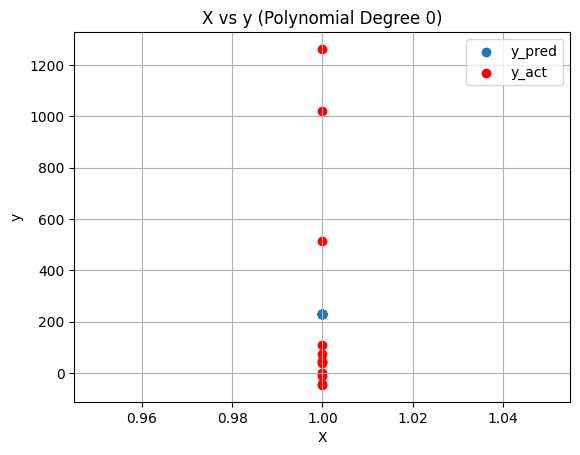

RMSE (train)(degree2) 412.97588794182343
RMSE (test)(degree2) 229.87178915801076


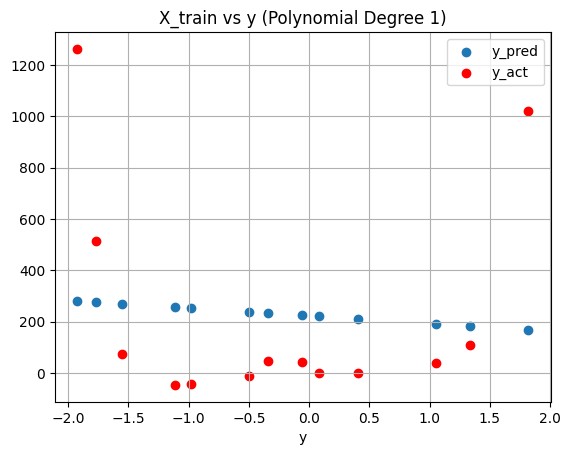

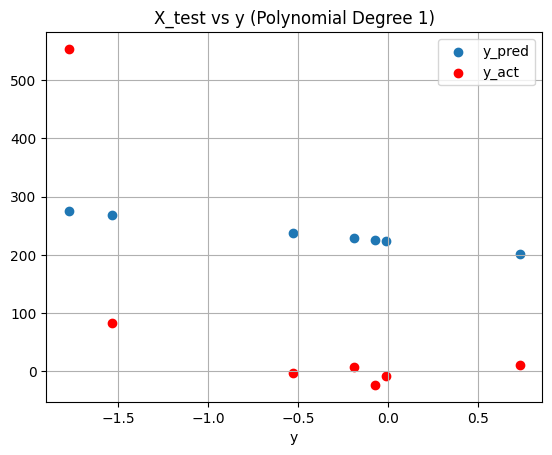

RMSE (train)(degree3) 229.34609139825355
RMSE (test)(degree3) 168.21708389571015


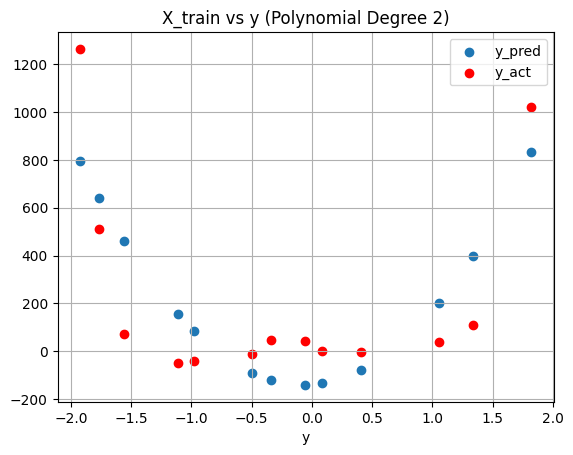

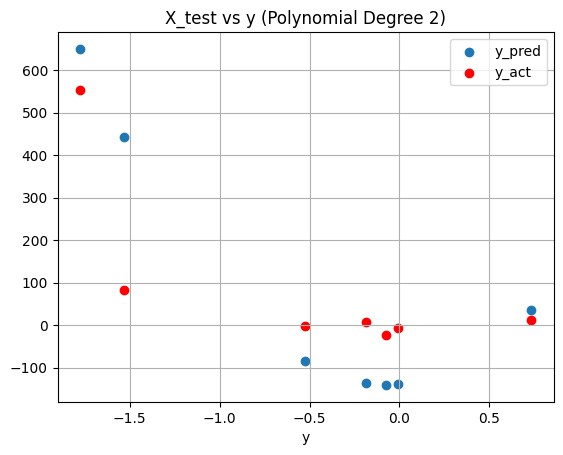

RMSE (train)(degree4) 226.73356241278324
RMSE (test)(degree4) 167.87968842409862


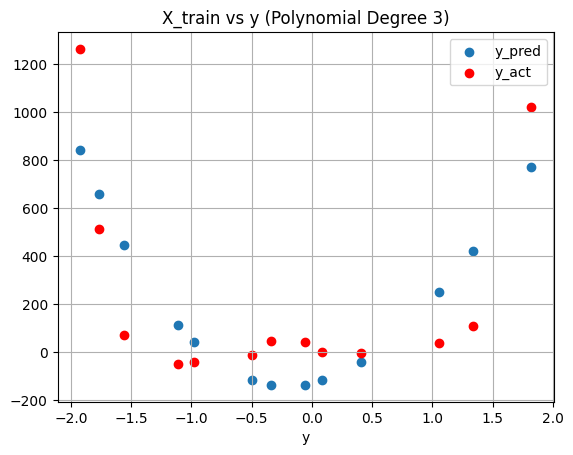

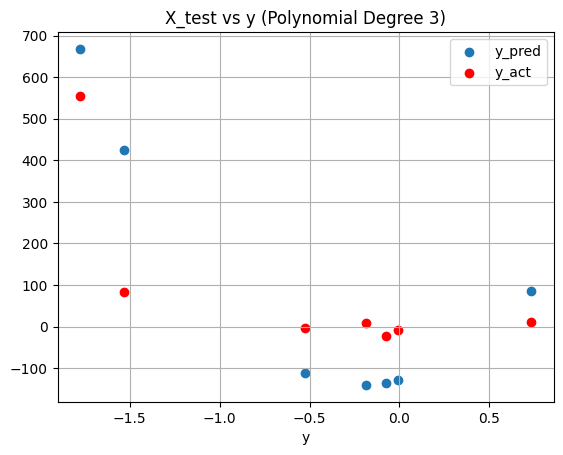

RMSE (train)(degree5) 78.96362534016596
RMSE (test)(degree5) 73.96964918369999


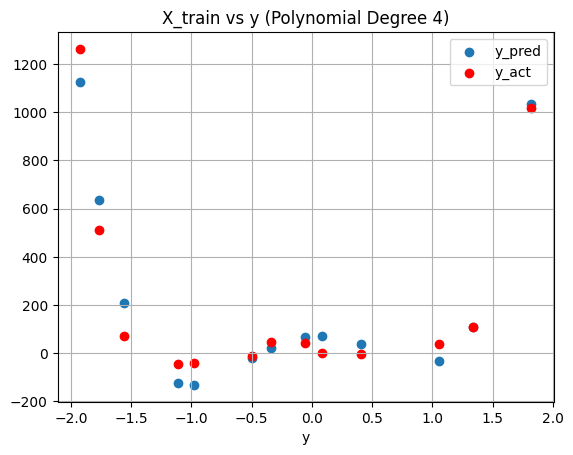

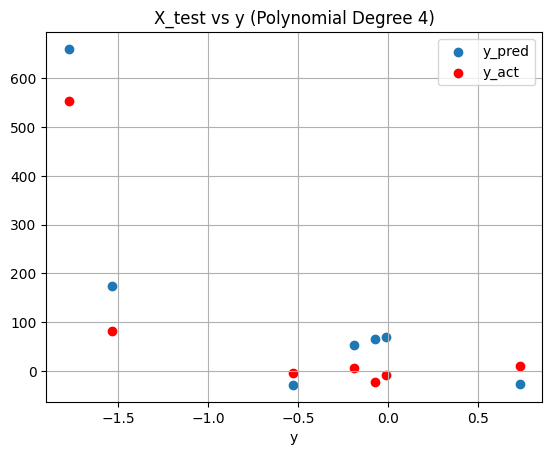

RMSE (train)(degree6) 56.00540214974233
RMSE (test)(degree6) 69.16758556570205


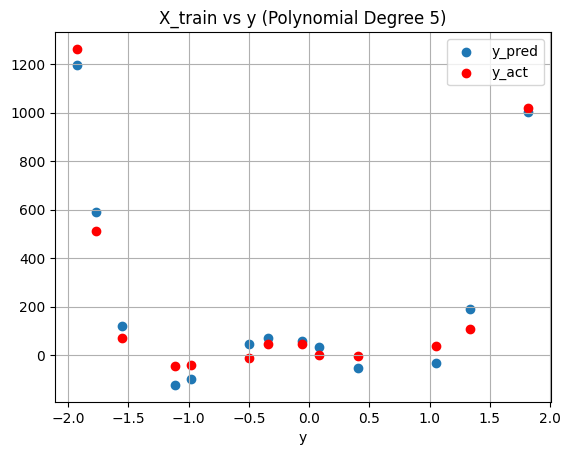

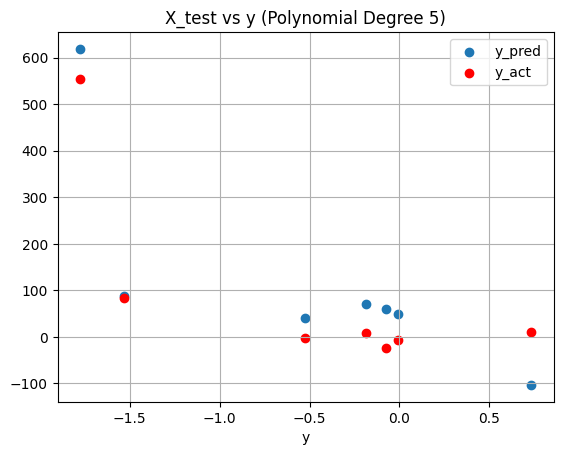

RMSE (train)(degree7) 17.044462744503583
RMSE (test)(degree7) 26.62891442771496


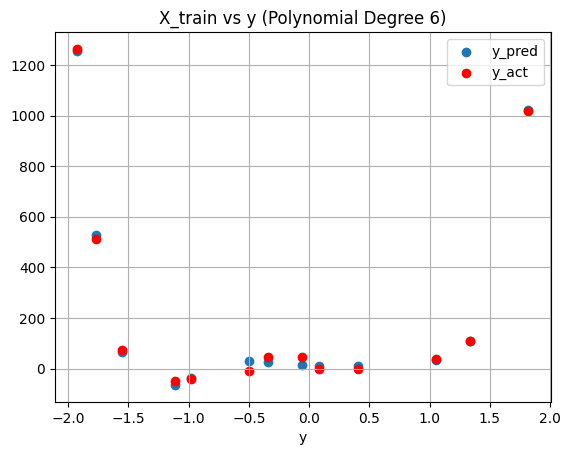

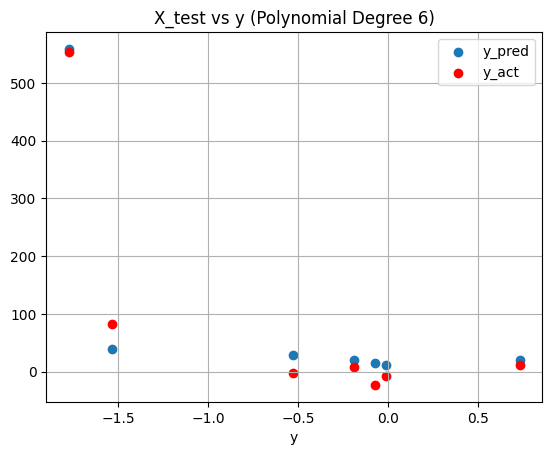

RMSE (train)(degree8) 16.312985829787806
RMSE (test)(degree8) 25.664236635930692


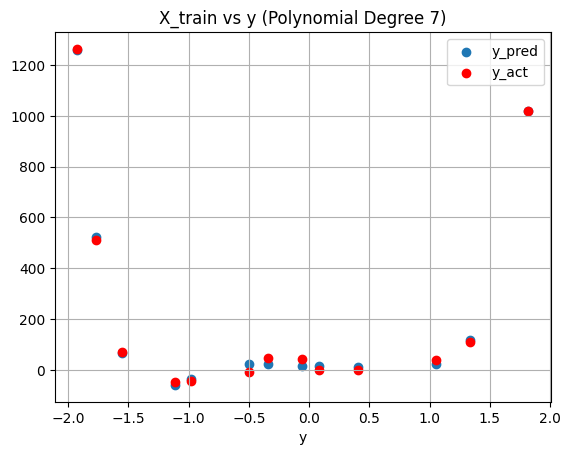

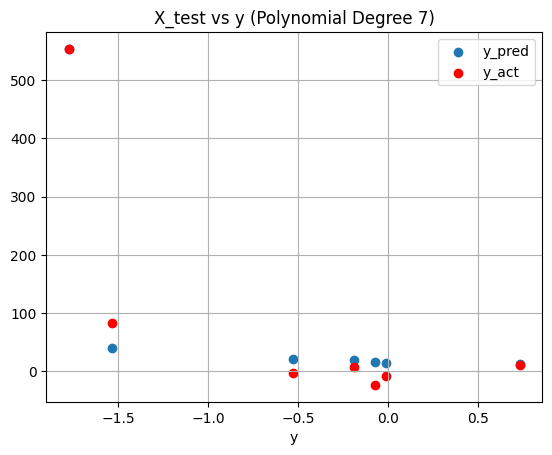

RMSE (train)(degree9) 12.183463837340915
RMSE (test)(degree9) 28.391796191063044


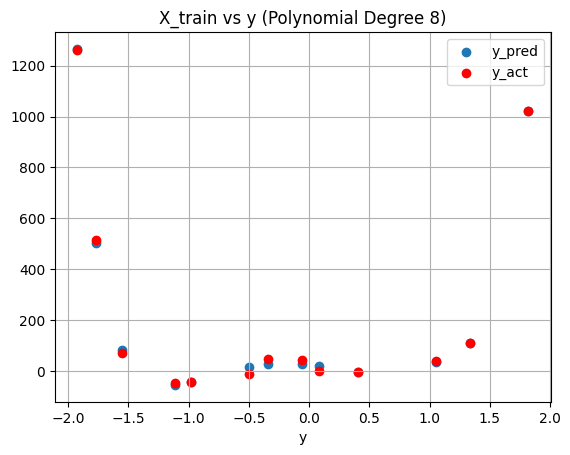

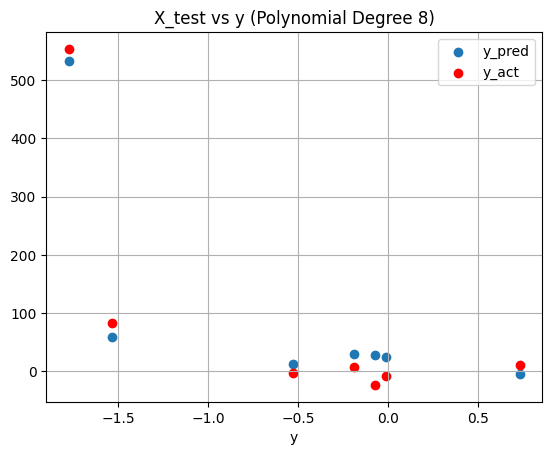

RMSE (train)(degree10) 11.708216062092792
RMSE (test)(degree10) 31.30622858883516


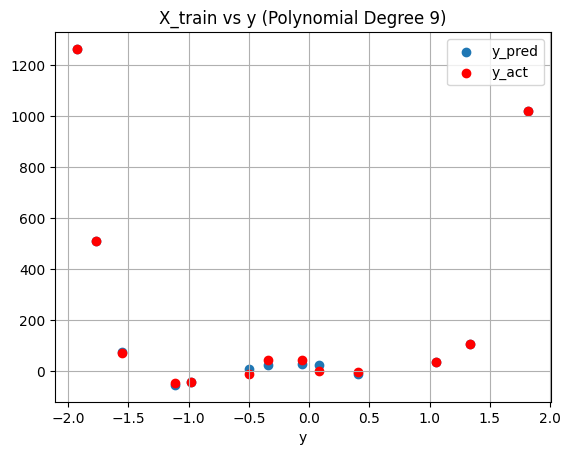

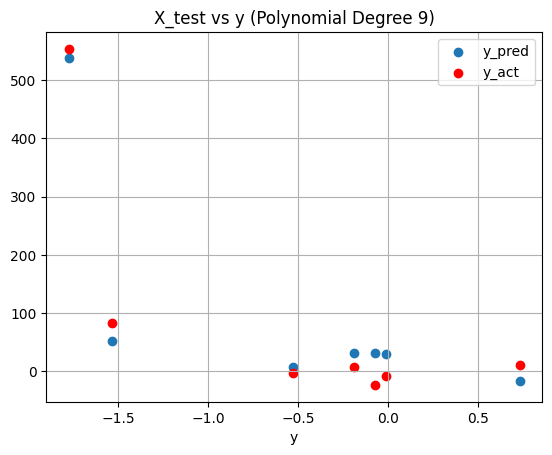

RMSE (train)(degree11) 6.863787433897976
RMSE (test)(degree11) 46.52086929725306


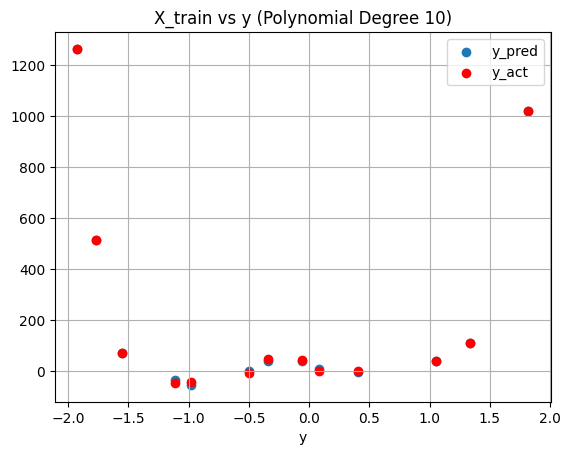

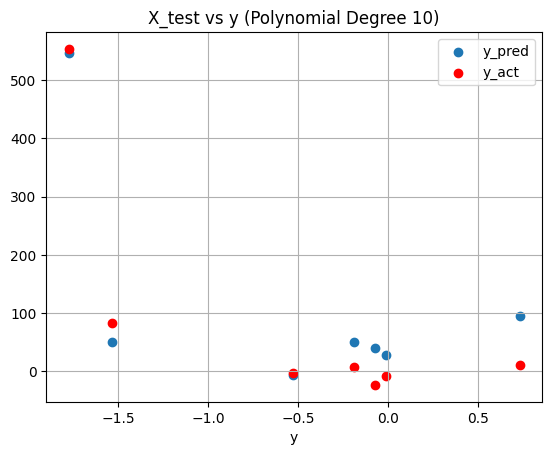

RMSE (train)(degree12) 1.8158955336043812
RMSE (test)(degree12) 123.99280464222406


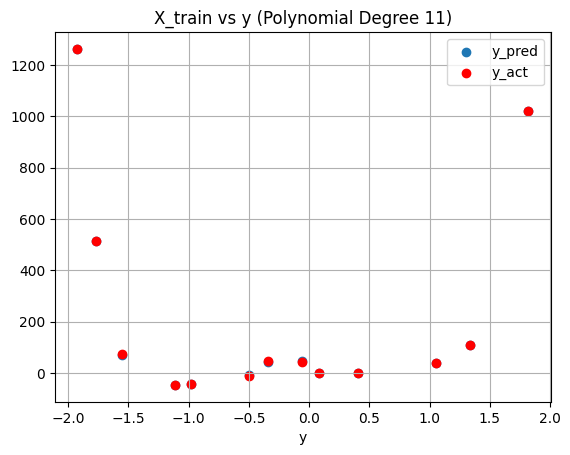

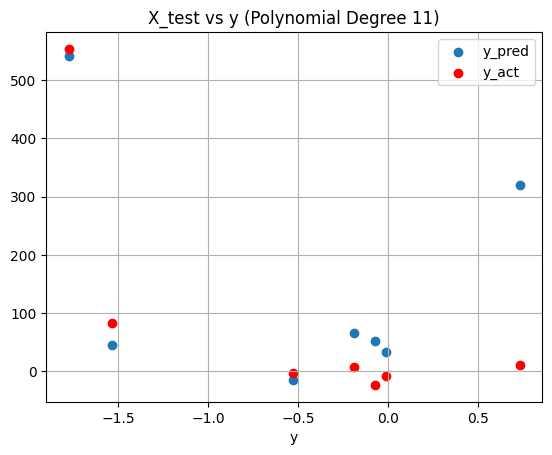

RMSE (train)(degree13) 0.0016551382121148994
RMSE (test)(degree13) 46.57090001827691


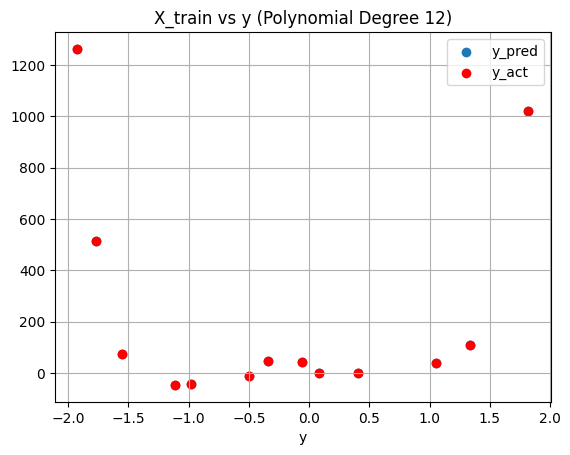

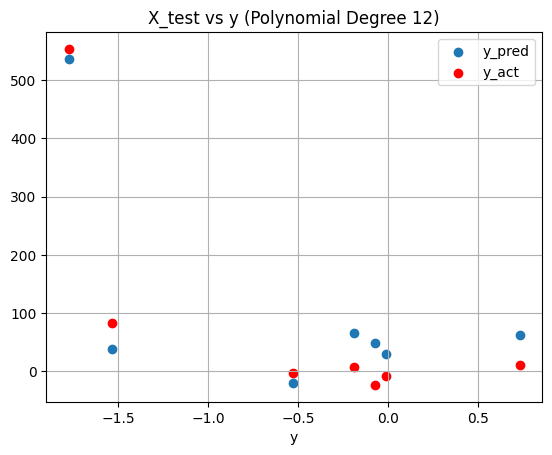

RMSE (train)(degree14) 4479.921548507083
RMSE (test)(degree14) 5246.759928314587


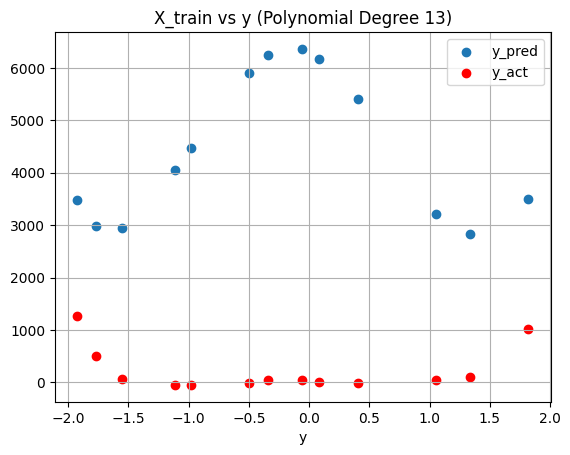

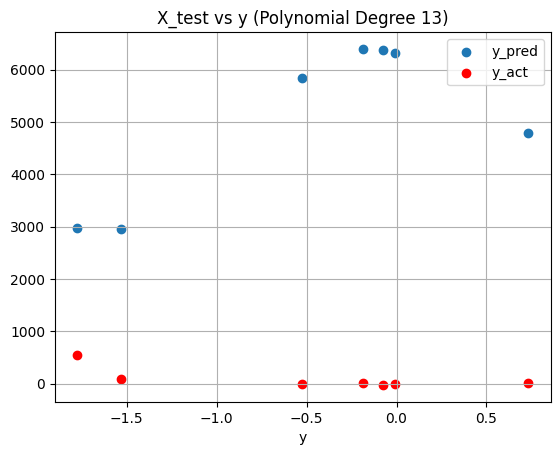

RMSE (train)(degree15) 478.10644611070603
RMSE (test)(degree15) 518.7579823135034


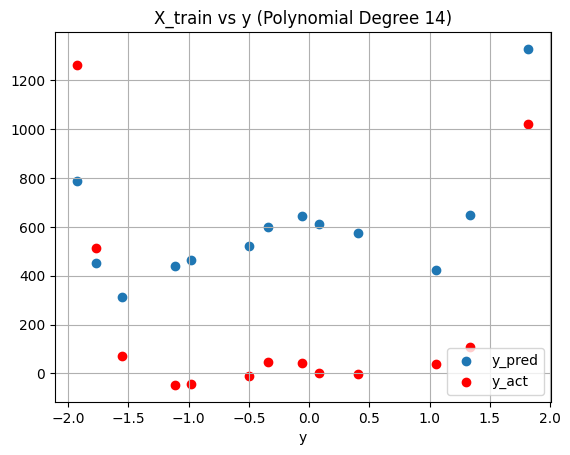

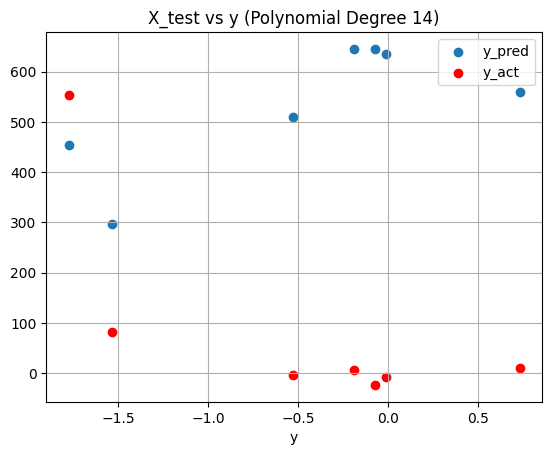

RMSE (train)(degree16) 915.4732799397776
RMSE (test)(degree16) 1033.9716434629079


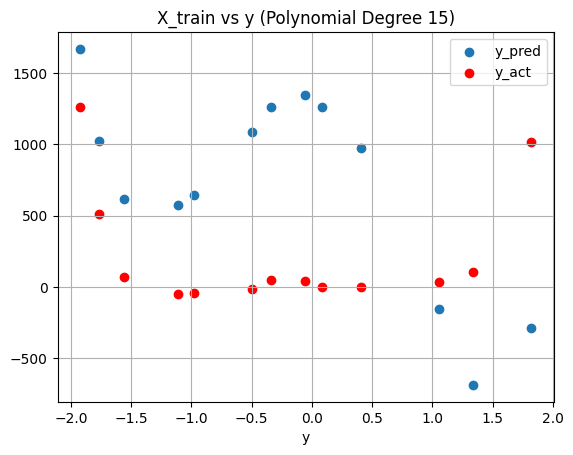

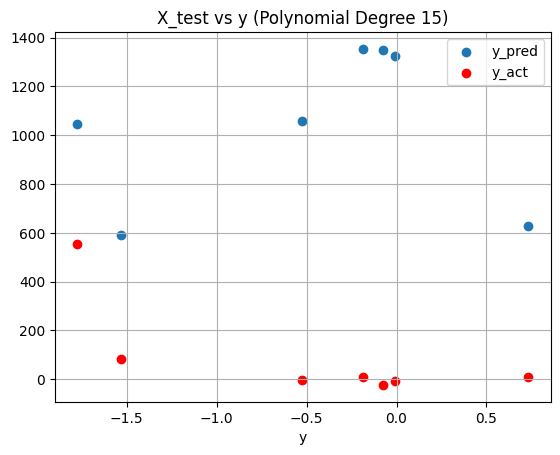

RMSE (train)(degree17) 1308.4304564779052
RMSE (test)(degree17) 1485.7375240705114


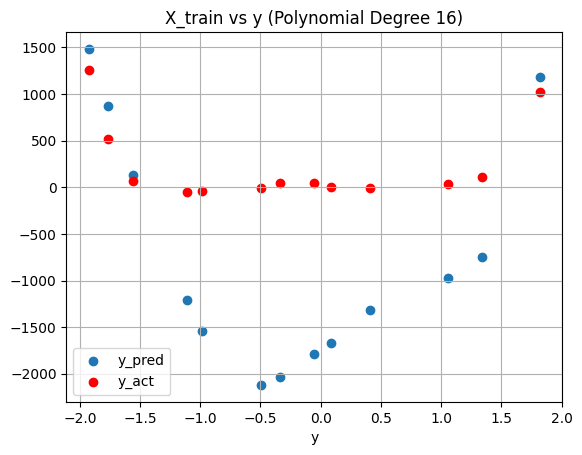

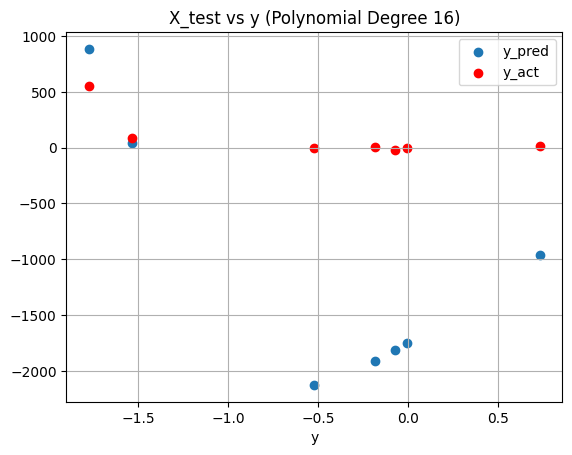

RMSE (train)(degree18) 6734.813470747743
RMSE (test)(degree18) 8071.282802510298


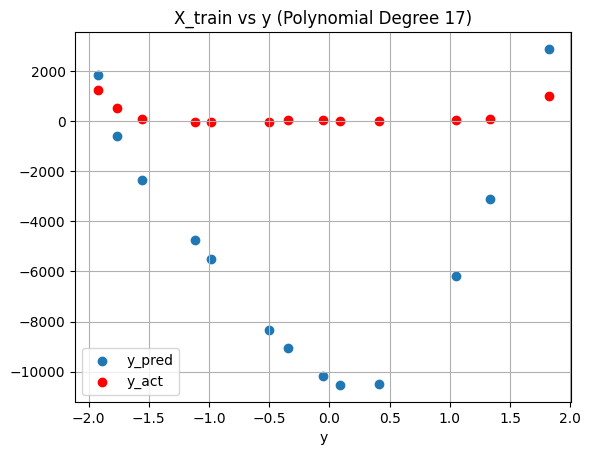

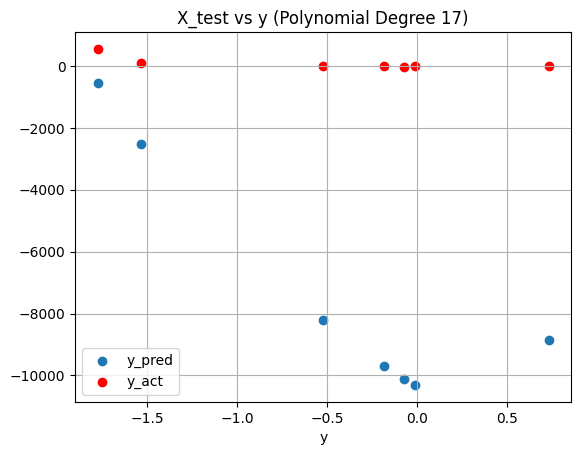

RMSE (train)(degree19) 6806.1610917784665
RMSE (test)(degree19) 7910.497584863614


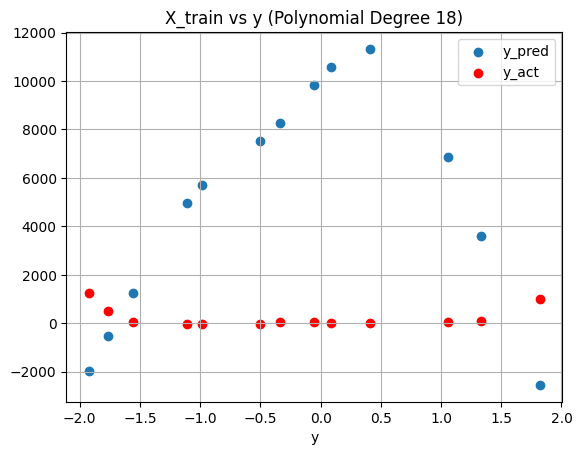

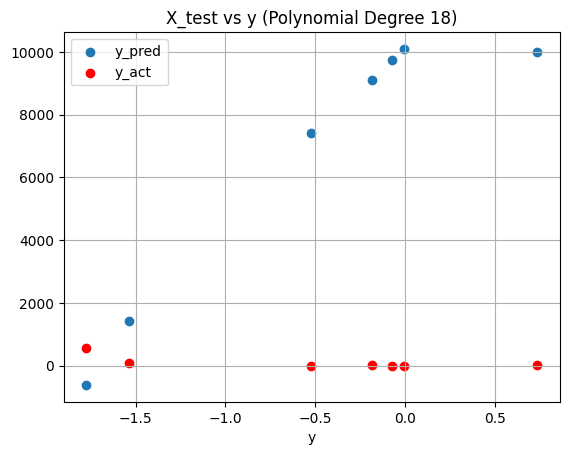

RMSE (train)(degree20) 16740.403033335428
RMSE (test)(degree20) 14689.177773539135


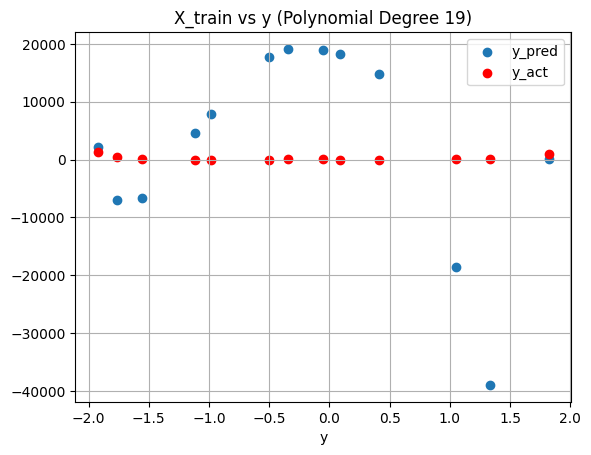

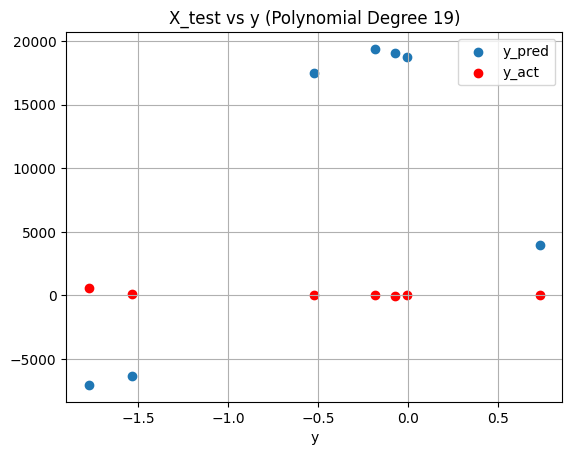

In [19]:
# analytic
n=len(y_train)
m=len(y_test)
X_list_train=[np.ones((n,1))]
X_list_test=[np.ones((m,1))]
w_ml_list=[]
X_l_train=np.ones((n,1))
X_l_test=np.ones((m,1))
w_ml=np.dot((la.inv(X_l_train.T @ X_l_train) @  X_l_train.T),y_train)
w_ml_list.append(w_ml)
y_pred=np.dot(X_l_train,w_ml.reshape(-1,1))
plt.scatter(X_l_train,y_pred,label='y_pred')
plt.scatter(X_l_train,y_train,label="y_act",c='r')
plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y (Polynomial Degree 0)")
plt.legend()
plt.grid(visible=True)
plt.show()

max_degree=21
rmse_train=[]
rmse_test=[]
for i in range(2,max_degree):
    X_l_train=np.ones((n,1))
    X_l_test=np.ones((m,1))
    for j in range(1,i):
        X_l_train=np.append(X_l_train,np.vstack(X_train**j),axis=1)
        X_l_test=np.append(X_l_test,np.vstack(X_test**j),axis=1)
    X_list_train.append(X_l_train)
    X_list_test.append(X_l_test)
    w_ml=np.dot((la.inv(X_l_train.T @ X_l_train) @  X_l_train.T),y_train)
    w_ml_list.append(w_ml)
    y_pred=np.dot(X_l_train,w_ml.reshape(-1,1))
    y_test_pred=np.dot(X_l_test,w_ml.reshape(-1,1))
    print(f'RMSE (train)(degree{i})',np.sqrt(mse(y_pred,y_train)))
    print(f'RMSE (test)(degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')

    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.xlabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i-1})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.xlabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i-1})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

In [20]:
y.shape

(20,)

In [21]:
max_degree

21

In [22]:
len(rmse_train)

19

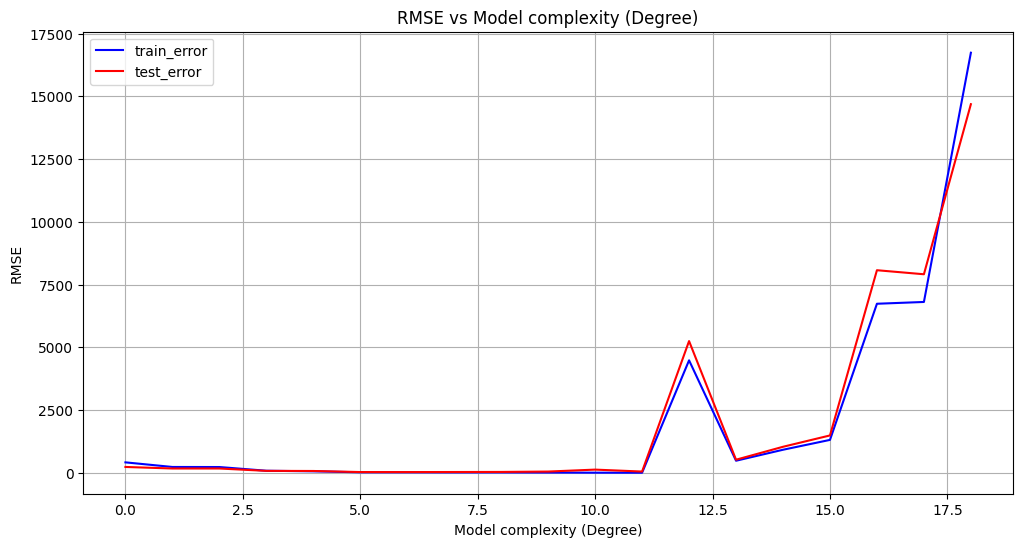

In [23]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree-2),rmse_train,c='b',label='train_error')
plt.plot(range(max_degree-2),rmse_test,c='r',label='test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

mean: 1.6373746798756463e-06 , standard deviation: 6.863787433897781 variance: 47.11157793773309


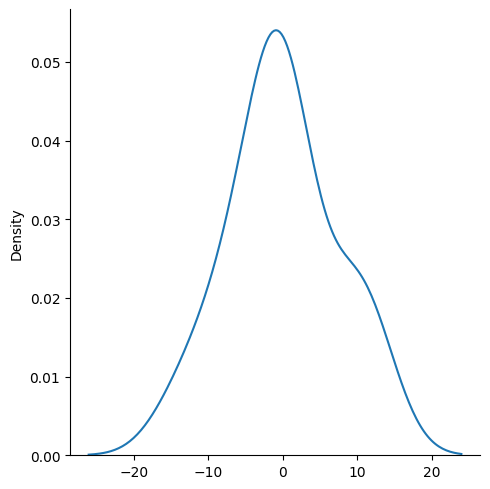

In [24]:
n=len(y_train)
m=len(y_test)
X_l_train=np.ones((n,1))
X_l_test=np.ones((m,1))
Degree=11
for j in range(1,Degree):
    X_l_train=np.append(X_l_train,np.vstack(X_train**j),axis=1)
    X_l_test=np.append(X_l_test,np.vstack(X_test**j),axis=1)
X_list_train.append(X_l_train)
X_list_test.append(X_l_test)
w_ml=np.dot((la.inv(X_l_train.T @ X_l_train) @  X_l_train.T),y_train)
y_pred=np.dot(X_l_train,w_ml.reshape(-1,1))
y_test_pred=np.dot(X_l_test,w_ml.reshape(-1,1))
train_noise=(y_pred.reshape(-1)-y_train)
sns.displot(train_noise,kind='kde')

print('mean:', np.mean(train_noise), ', standard deviation:', np.std(train_noise), 'variance:', np.std(train_noise)**2)

((array([-1.62649229, -1.1460438 , -0.83908498, -0.59616318, -0.38436112,
         -0.18866497,  0.        ,  0.18866497,  0.38436112,  0.59616318,
          0.83908498,  1.1460438 ,  1.62649229]),
  array([-1.32879221e+01, -7.29785740e+00, -7.19527596e+00, -2.30495619e+00,
         -1.81025995e+00, -2.90350877e-01, -7.33306581e-02,  3.39003401e-03,
          2.13809585e-01,  1.26097844e+00,  8.49182496e+00,  1.11057431e+01,
          1.11842283e+01])),
 (7.403083841305979, 1.6373746800326803e-06, 0.9648607367556714))

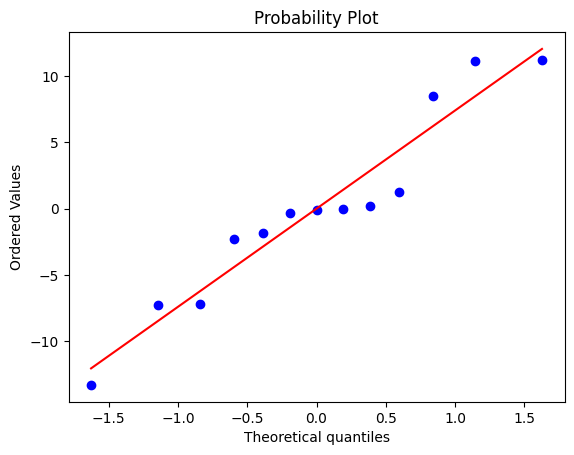

In [25]:
from scipy import stats

stats.probplot(train_noise,dist='norm',plot=plt)

((array([-1.31487275, -0.74397649, -0.3471943 ,  0.        ,  0.3471943 ,
          0.74397649,  1.31487275]),
  array([-32.25142194,  -7.43315133,  -3.81203249,  35.3091906 ,
          43.3574065 ,  62.83063845,  83.45722644])),
 (45.94250232480865, 25.92255089085302, 0.9854538758437557))

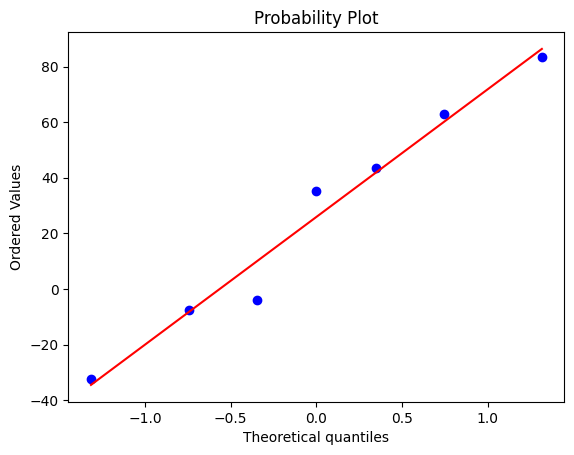

In [26]:
test_noise=y_test_pred.reshape(-1)-y_test
stats.probplot(test_noise,plot=plt)

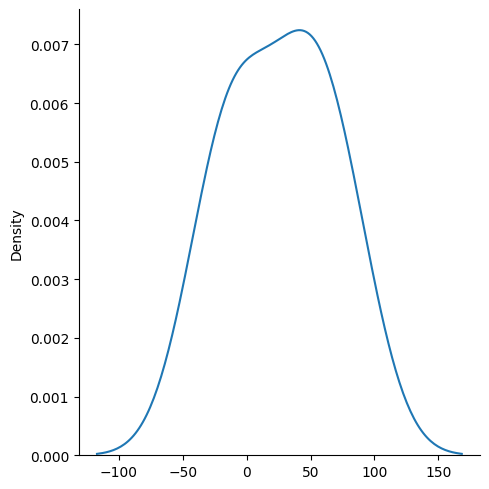

In [27]:
sns.displot(test_noise,kind='kde')


In [28]:
print('mean:', np.mean(test_noise), ', standard deviation:', np.std(test_noise), 'variance:', np.std(test_noise)**2)

mean: 25.922550890853024 , standard deviation: 38.62916819559072 variance: 1492.2126354832378


rmse for test: 218.66838627013263


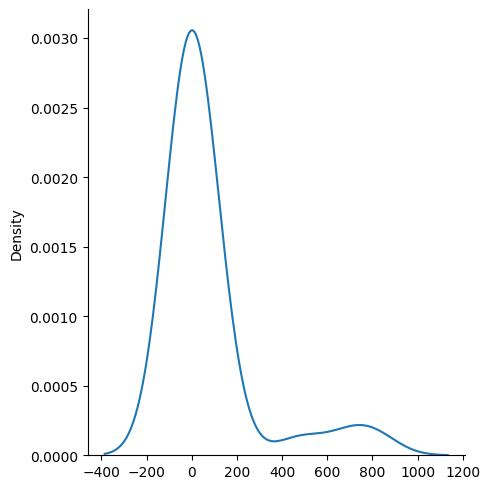

In [29]:
df_test = pd.read_csv('test.csv',header=None)
X_t=np.array(df_test[0]).reshape(-1,1)
y_t=np.array(df_test[1])
m=len(y_t)
X_l_test=np.ones((m,1))
for j in range(1,Degree):
    
    X_l_test=np.append(X_l_test,np.vstack(X_t**j),axis=1)


y_test_pred=np.dot(X_l_test,w_ml.reshape(-1,1))
test_noise=(y_test_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test:', np.sqrt(mse(y_test_pred,y_t)))

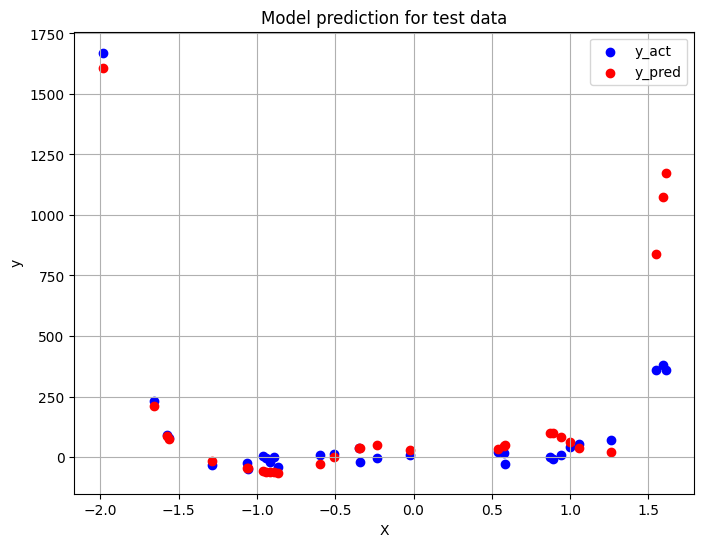

optimised weights: [   26.22039948  -204.55607049  -184.90233556  1279.65878464
   681.44637076 -1732.81621649  -888.50838994   845.38130517
   436.01362378  -130.14108652   -65.73338073]


In [30]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label='y_act')
plt.scatter(X_t,y_test_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('optimised weights:', w_ml)

RMSE (train)(degree0) 414.38106045486916
RMSE (test)(degree0) 239.21278950769317


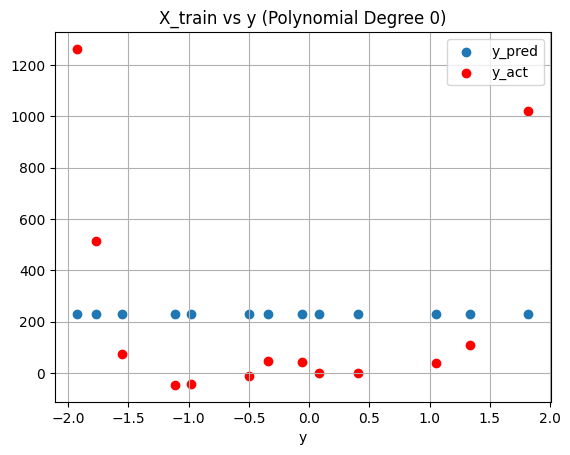

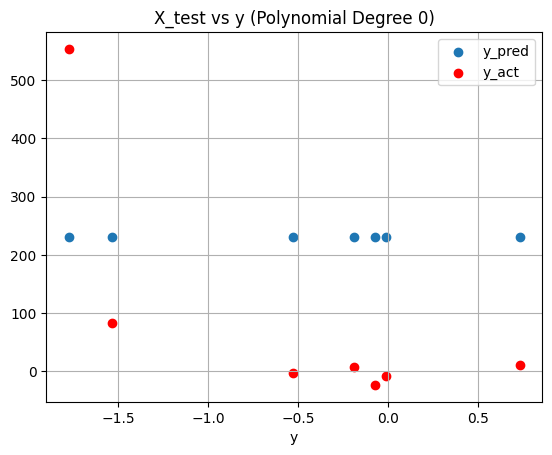

RMSE (train)(degree1) 412.97680133296296
RMSE (test)(degree1) 230.08036730679262


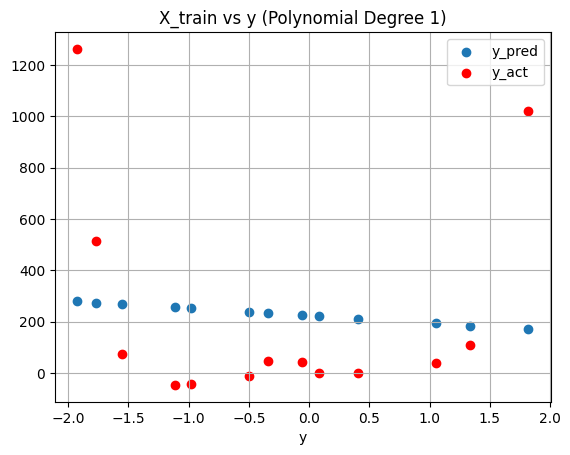

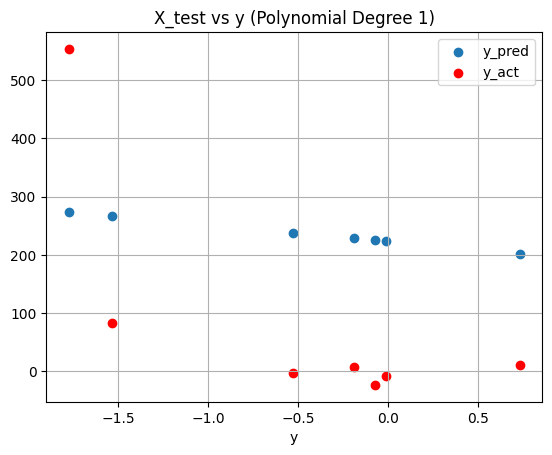

RMSE (train)(degree2) 229.34987203596117
RMSE (test)(degree2) 167.9711626587015


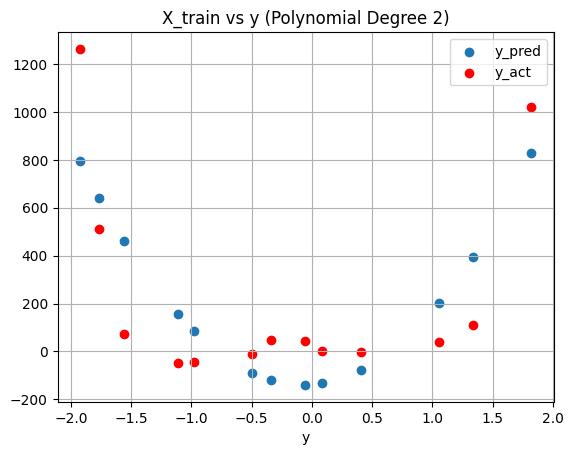

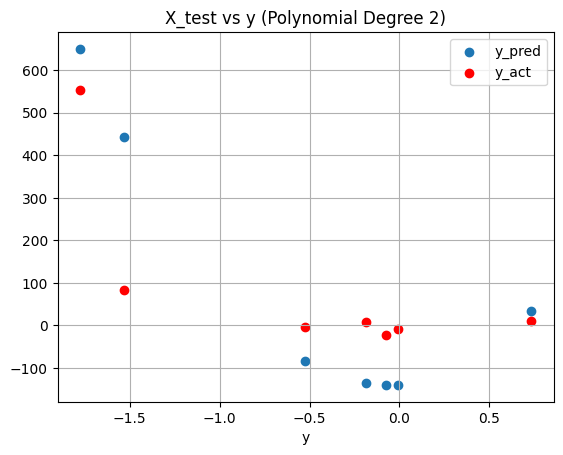

RMSE (train)(degree3) 226.7555964923257
RMSE (test)(degree3) 167.50784737367766


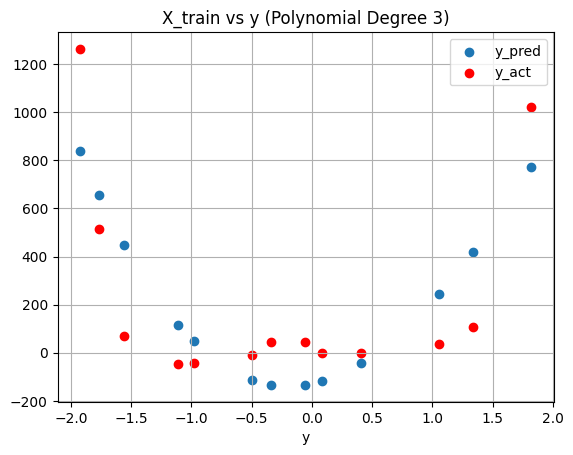

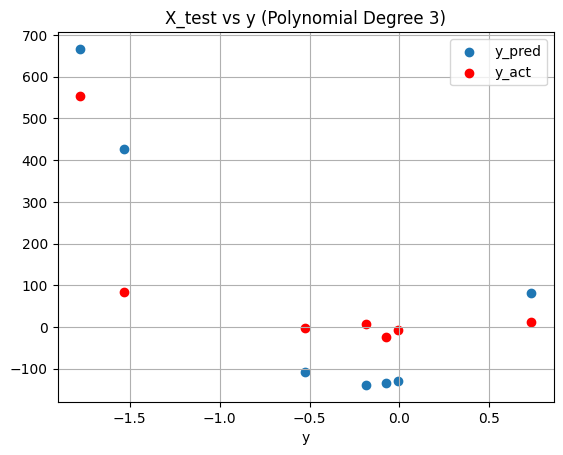

RMSE (train)(degree4) 79.06711314860159
RMSE (test)(degree4) 73.71095542280115


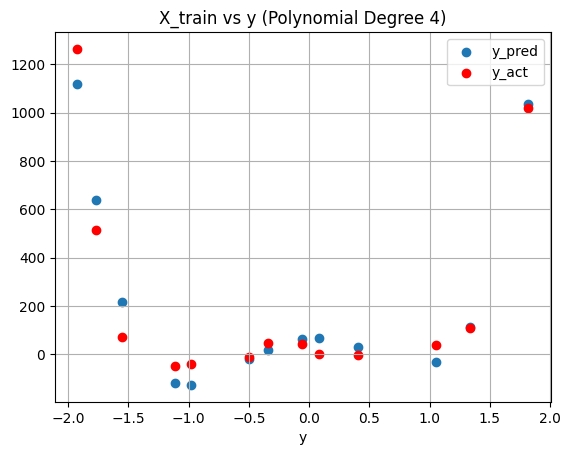

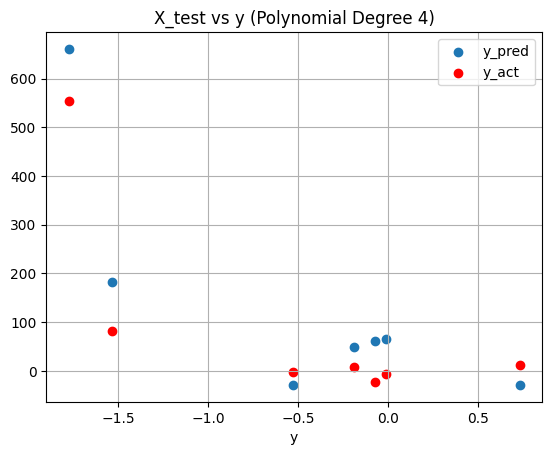

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.439e+02, tolerance: 2.232e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree5) 56.910472220700925
RMSE (test)(degree5) 63.77703280895583


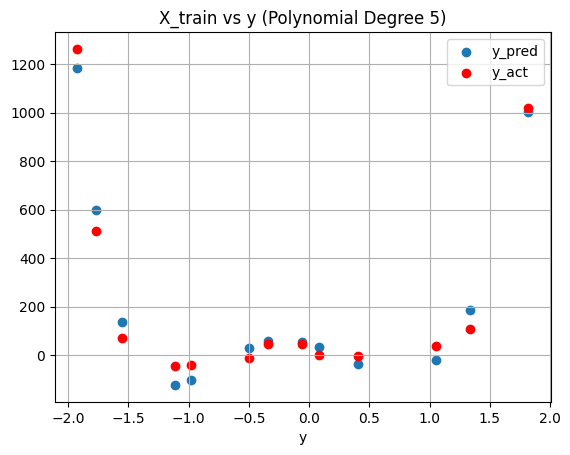

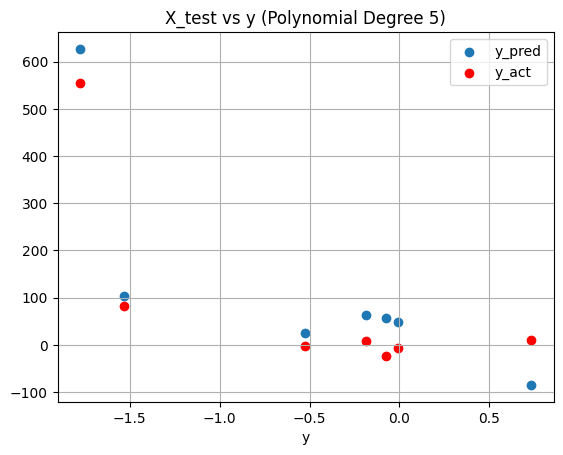

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.260e+02, tolerance: 2.232e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree6) 21.06203933160333
RMSE (test)(degree6) 28.60631771073896


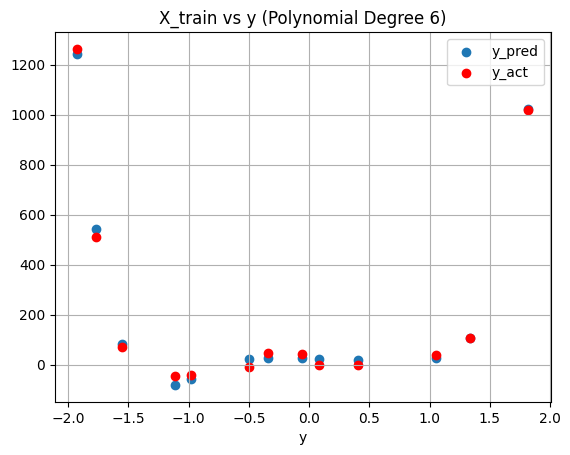

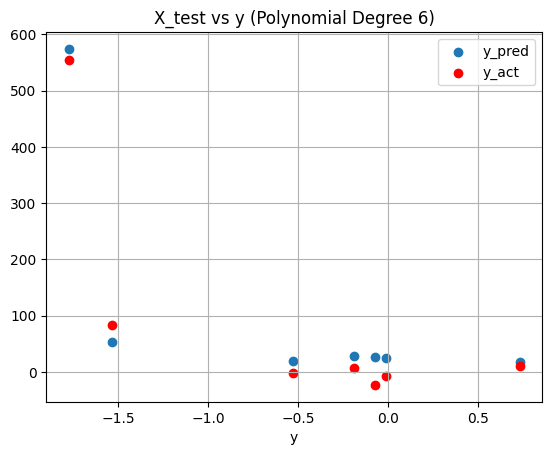

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.755e+03, tolerance: 2.232e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree7) 18.183656228920285
RMSE (test)(degree7) 27.216494013100665


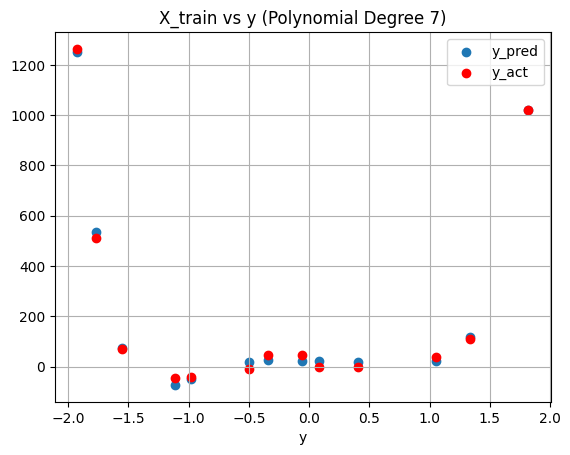

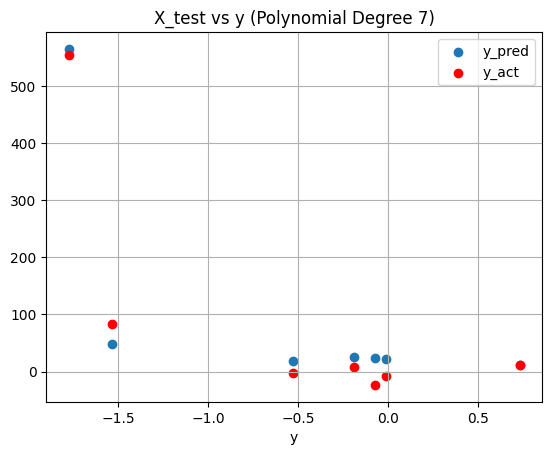

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.025e+02, tolerance: 2.232e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree8) 15.091417577889718
RMSE (test)(degree8) 22.843137775532913


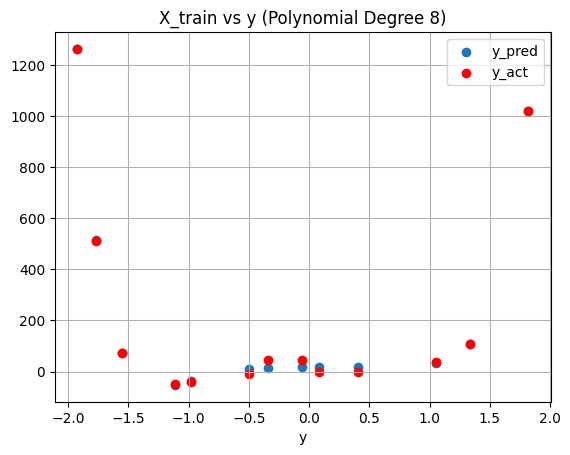

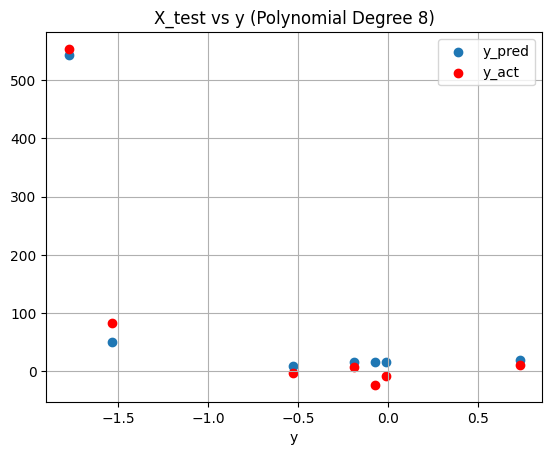

RMSE (train)(degree9) 15.192456540819363
RMSE (test)(degree9) 22.3952680788135


C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.507e+02, tolerance: 2.232e+02
  model = cd_fast.enet_coordinate_descent(


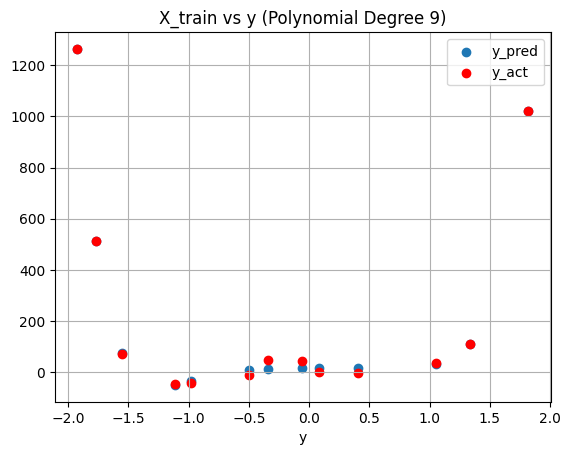

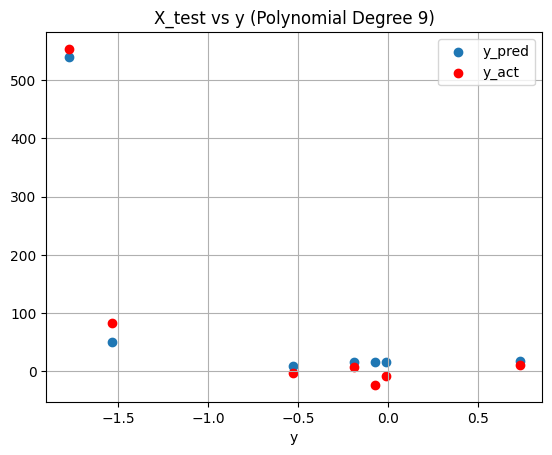

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.523e+02, tolerance: 2.232e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree10) 15.178152594811886
RMSE (test)(degree10) 21.9811975382254


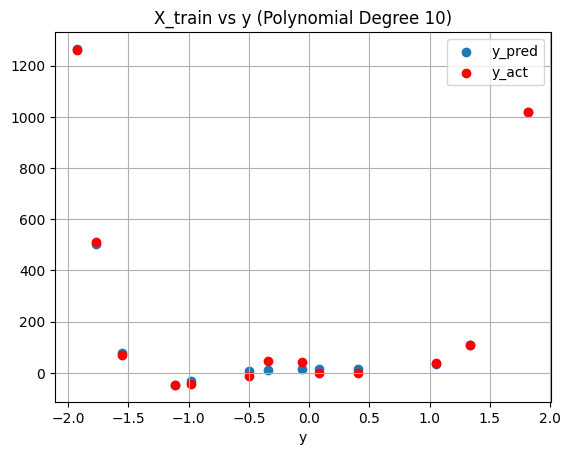

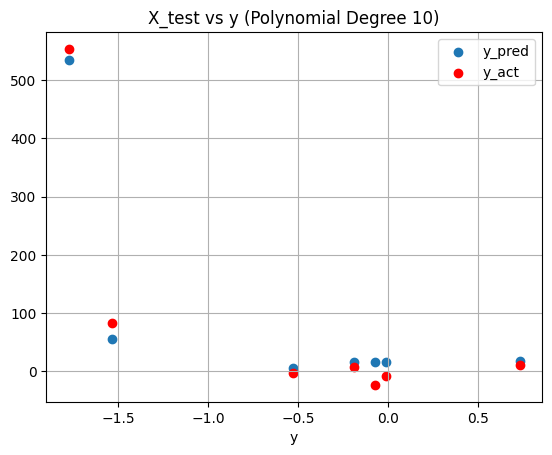

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.465e+03, tolerance: 2.232e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree11) 15.143362142698301
RMSE (test)(degree11) 21.96667054780036


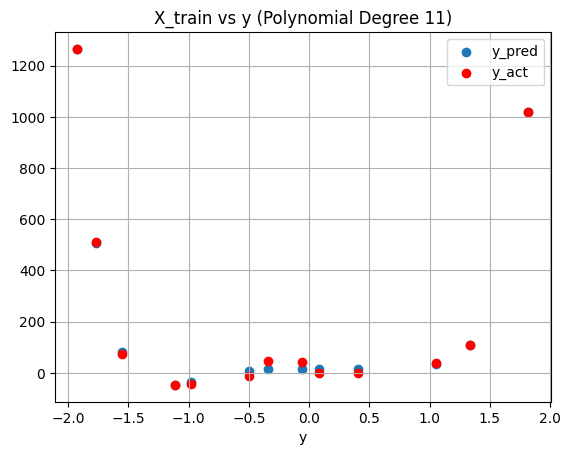

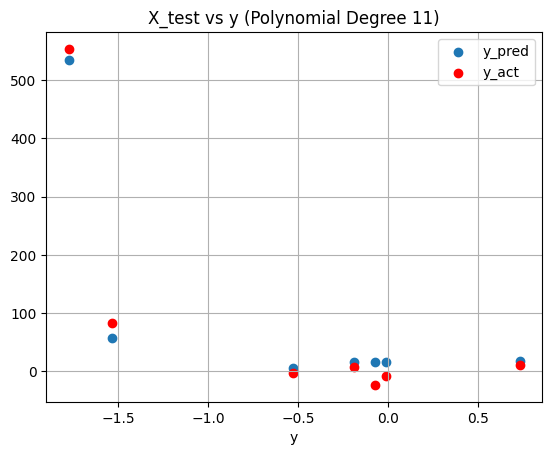

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.034e+03, tolerance: 2.232e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree12) 15.109119940107593
RMSE (test)(degree12) 22.142217825817276


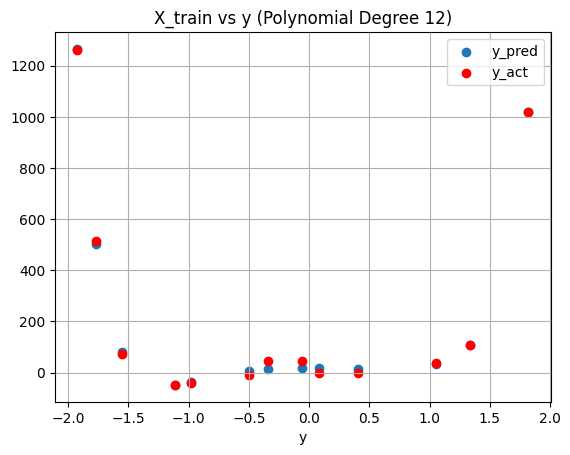

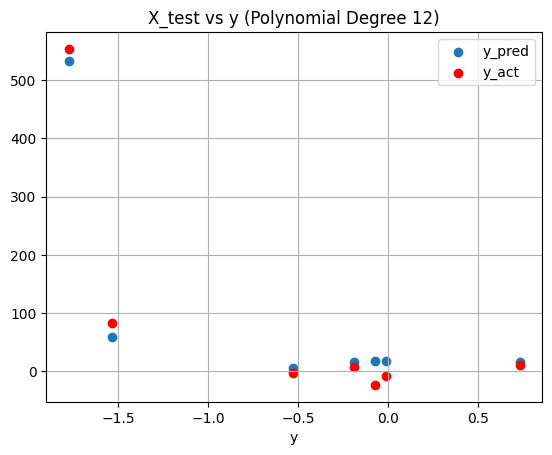

RMSE (train)(degree13) 15.048422583784546
RMSE (test)(degree13) 22.056280691612017


C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.226e+03, tolerance: 2.232e+02
  model = cd_fast.enet_coordinate_descent(


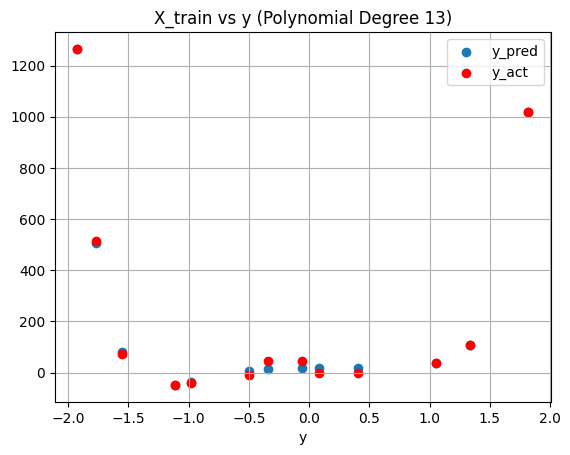

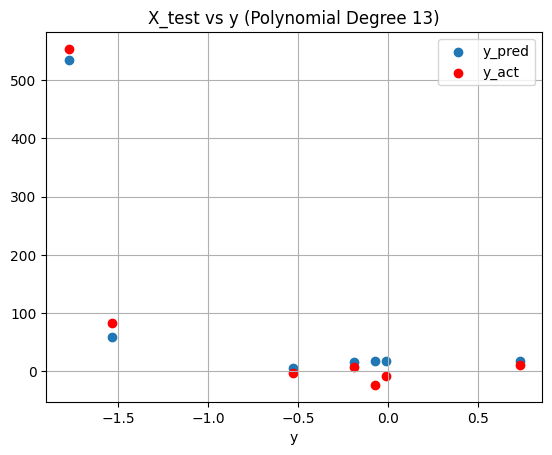

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.395e+03, tolerance: 2.232e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree14) 15.035675433797268
RMSE (test)(degree14) 22.07029339994709


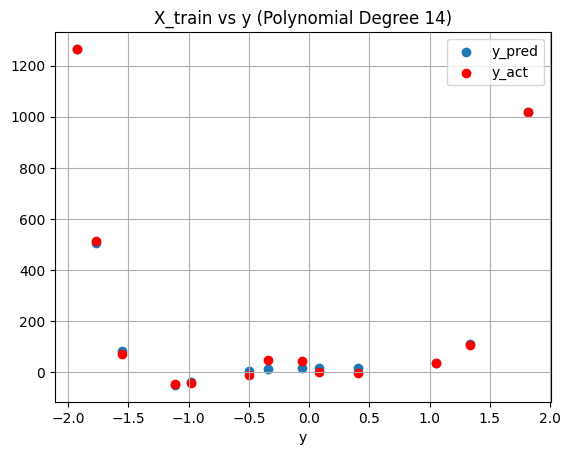

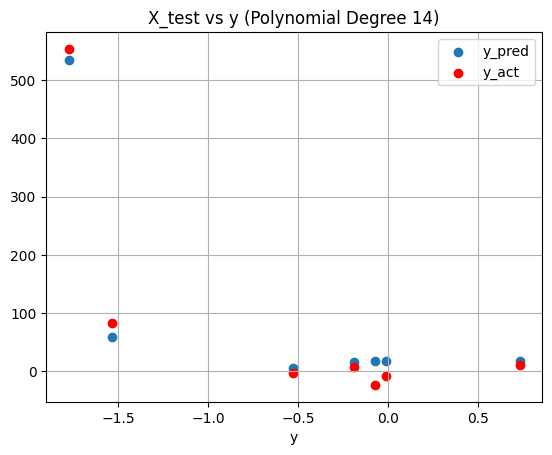

RMSE (train)(degree15) 14.991457564967606
RMSE (test)(degree15) 22.008977555015644


C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.437e+03, tolerance: 2.232e+02
  model = cd_fast.enet_coordinate_descent(


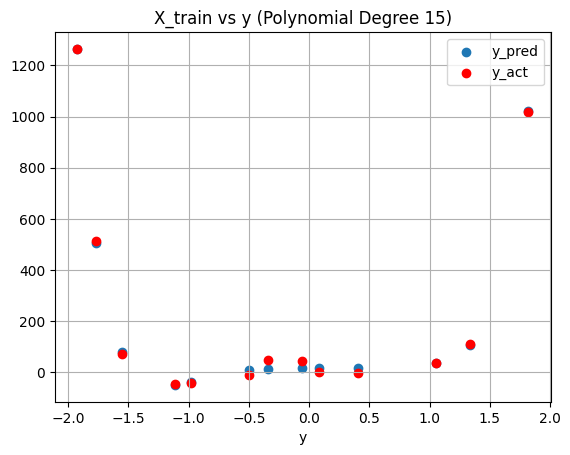

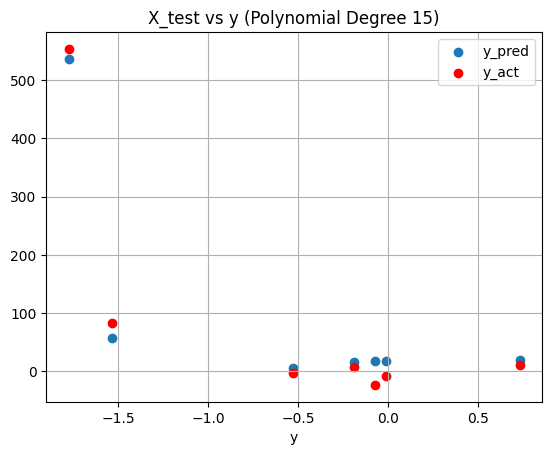

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.492e+03, tolerance: 2.232e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree16) 14.97632581588225
RMSE (test)(degree16) 21.999419484657928


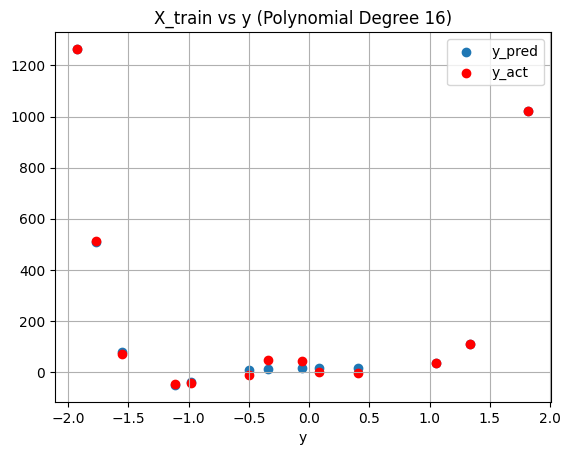

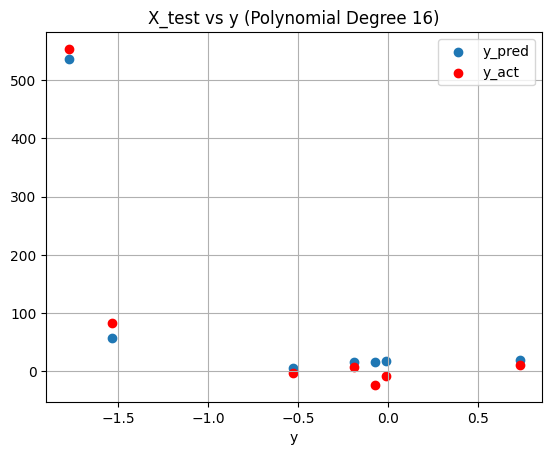

RMSE (train)(degree17) 14.95567440050582
RMSE (test)(degree17) 21.995642720301


C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.493e+03, tolerance: 2.232e+02
  model = cd_fast.enet_coordinate_descent(


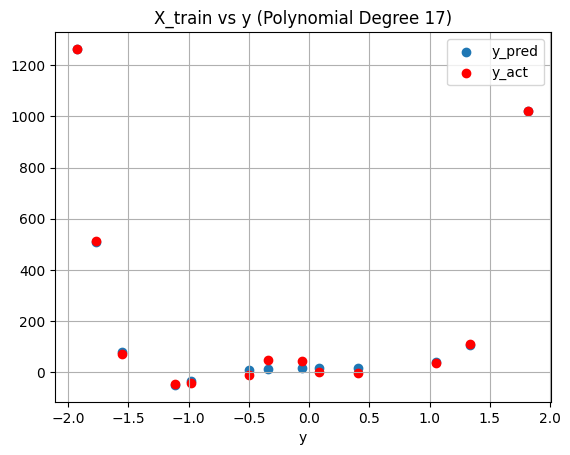

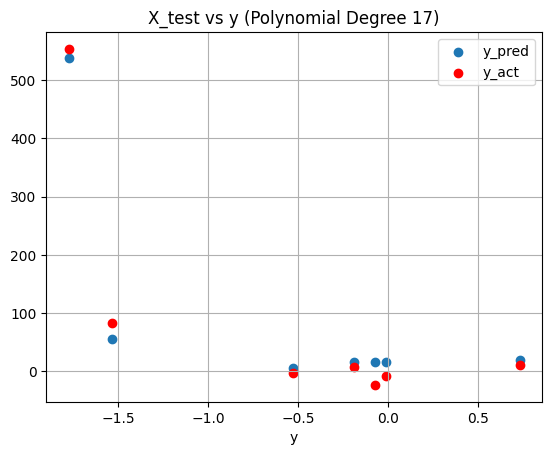

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.508e+03, tolerance: 2.232e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree18) 14.946505153340745
RMSE (test)(degree18) 22.016947917594564


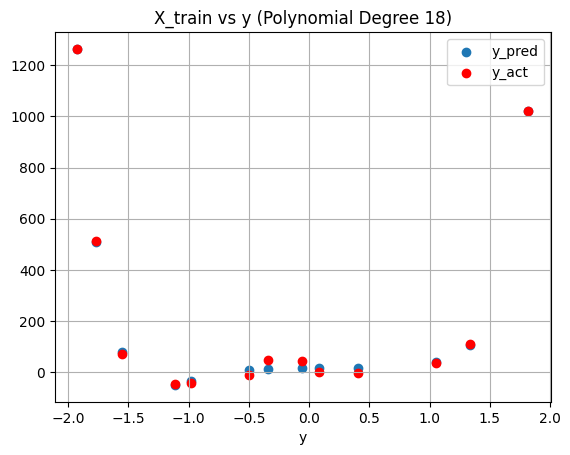

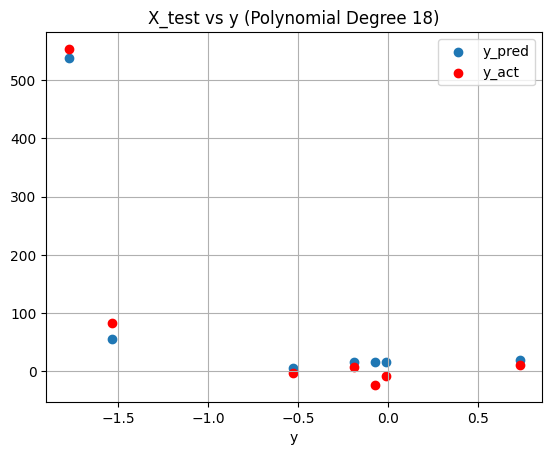

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.497e+03, tolerance: 2.232e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree19) 14.939892228543453
RMSE (test)(degree19) 22.041688768164768


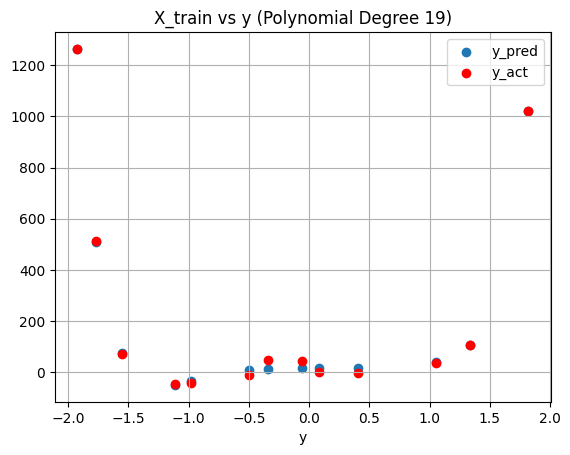

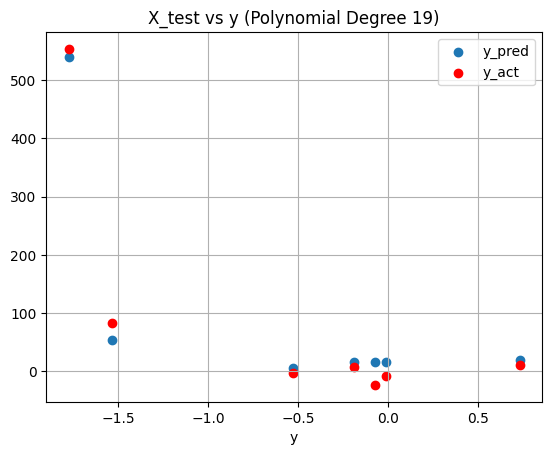

RMSE (train)(degree20) 14.940546617259654
RMSE (test)(degree20) 22.080086094941944


C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.497e+03, tolerance: 2.232e+02
  model = cd_fast.enet_coordinate_descent(


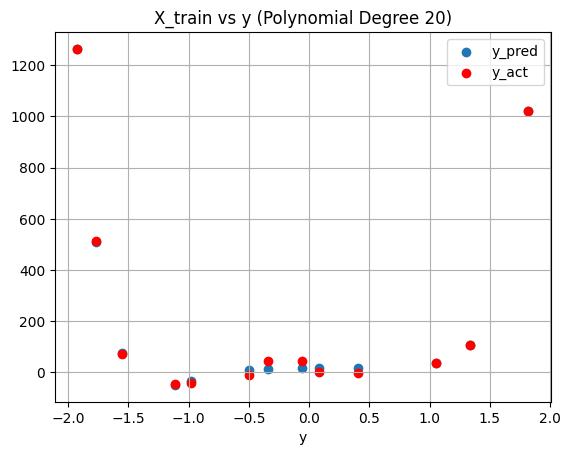

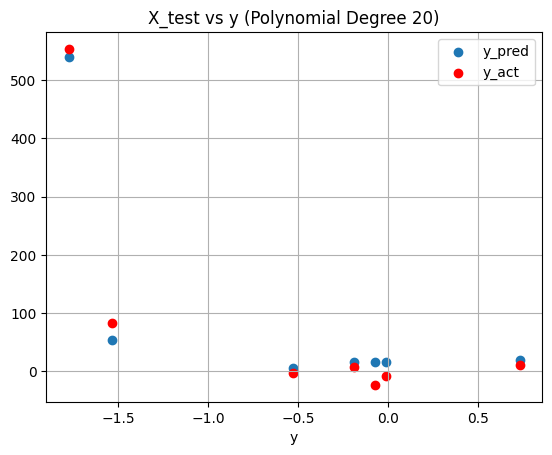

In [31]:

#lasso regularization

max_degree=21
rmse_train=[]
rmse_test=[]
for i in range(max_degree):
# print(i)    
    poly = PolynomialFeatures(degree = i)
    X_poly_train=poly.fit_transform(X_train)


    
# instantiating the lasso regression model
    Model = Lasso()
 
# training the model
    Model.fit(X_poly_train, y_train)
 
# making predictions 
    y_pred = Model.predict(X_poly_train)
    X_poly_test=poly.fit_transform(X_test)
    y_test_pred=Model.predict(X_poly_test)
    print(f'RMSE (train)(degree{i})',np.sqrt(mse(y_pred,y_train)))

    print(f'RMSE (test)(degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')

    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.xlabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.xlabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()



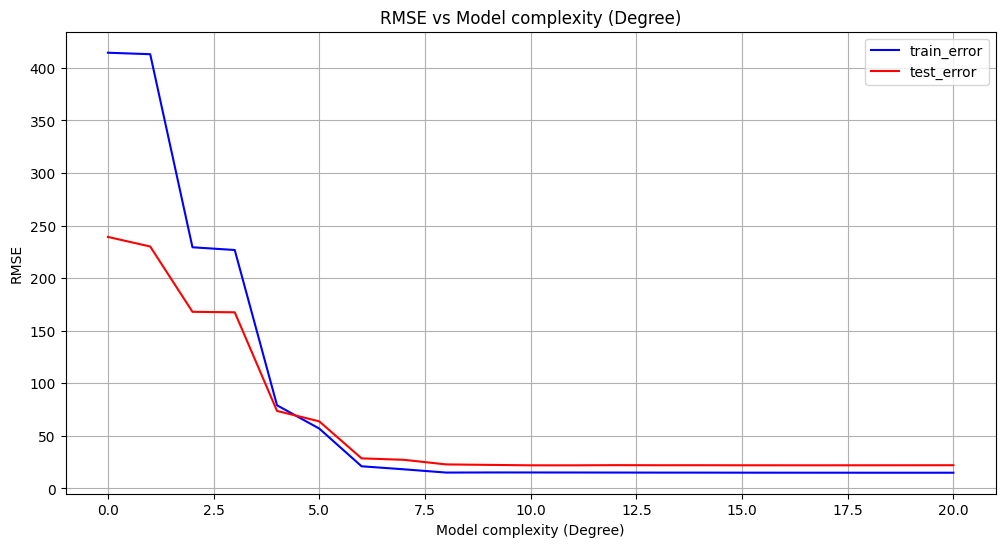

In [32]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree),rmse_train,c='b',label='train_error')
plt.plot(range(max_degree),rmse_test,c='r',label='test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.251e+03, tolerance: 2.934e+02
  model = cd_fast.enet_coordinate_descent(


rmse for test: 20.487415389709817
mean: -2.6290081223123708e-14 , standard deviation: 20.487415389709817 variance: 419.73418935051865


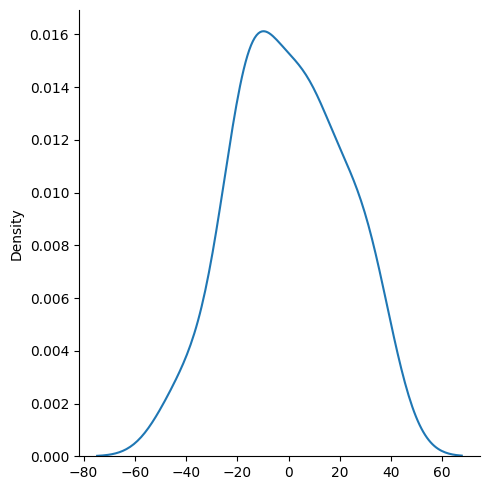

In [33]:
df_test = pd.read_csv('test.csv',header=None)
X_t=np.array(df_test[0]).reshape(-1,1)
y_t=np.array(df_test[1])
poly = PolynomialFeatures(degree = 11)
x_poly=poly.fit_transform(X_t)
Model = Lasso()
Model.fit(x_poly, y_t)
y_pred=Model.predict(x_poly)
test_noise=(y_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test:', np.sqrt(mse(y_pred,y_t)))
print('mean:', np.mean(test_noise), ', standard deviation:', np.std(test_noise), 'variance:', np.std(test_noise)**2)



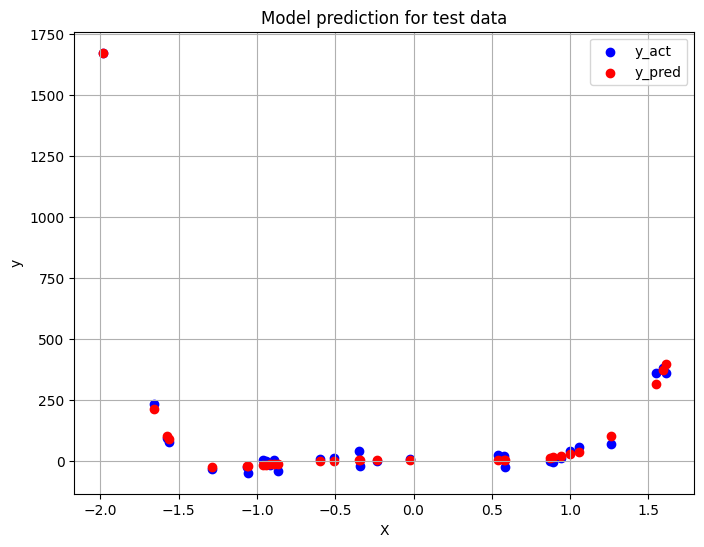

optimised weights: [ 0.         -0.         -7.44736174  0.         -0.         25.83204961
  5.25452243 -1.70802554  3.86835946 -0.77174618  0.15097088 -0.27072491]


In [34]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label='y_act')
plt.scatter(X_t,y_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('optimised weights:', Model.coef_)

RMSE (train)(degree0) 414.38106045486916
RMSE (test)(degree0) 239.21278950769317


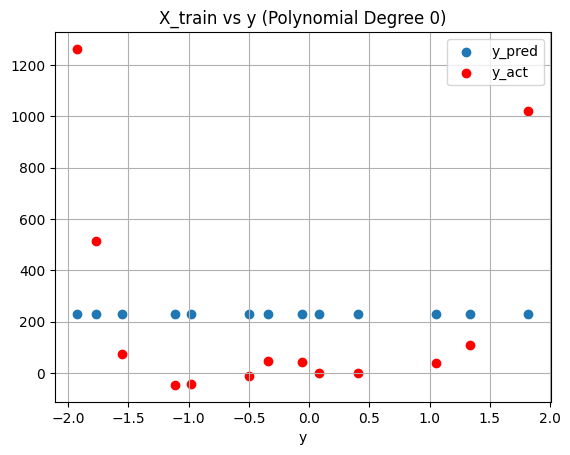

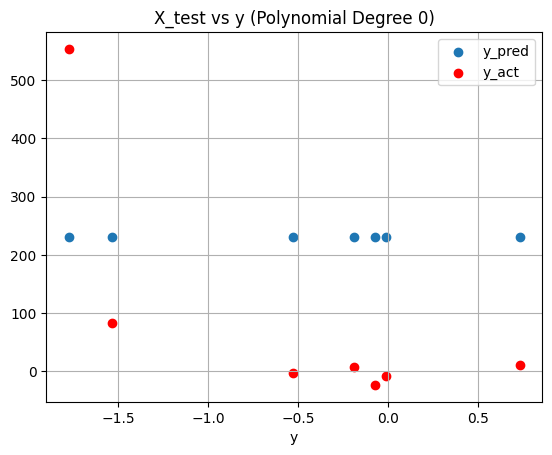

RMSE (train)(degree1) 412.9801224711965
RMSE (test)(degree1) 230.32286520908795


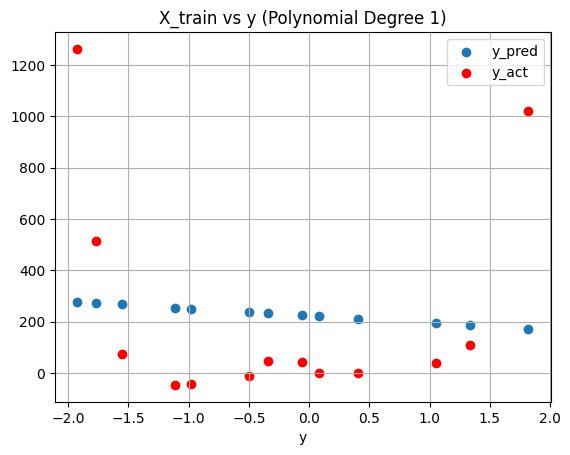

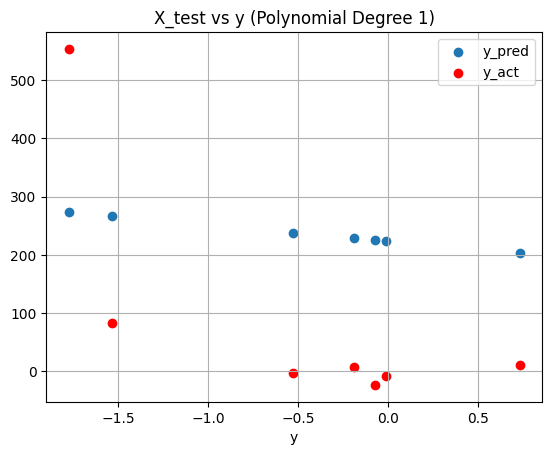

RMSE (train)(degree2) 229.93462904889898
RMSE (test)(degree2) 158.89550932667433


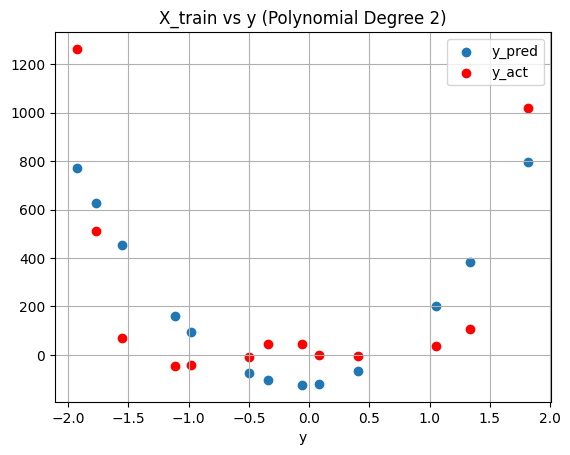

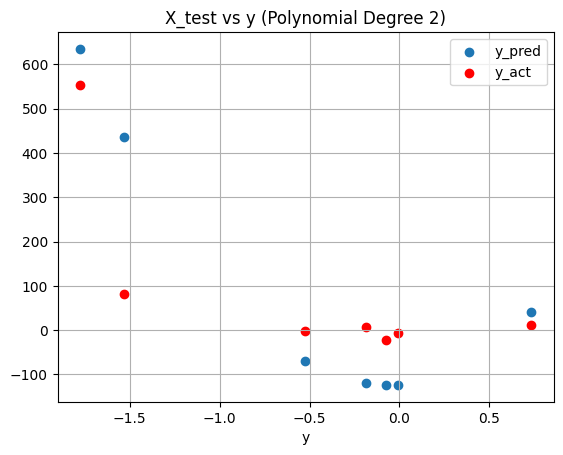

RMSE (train)(degree3) 227.6626998807867
RMSE (test)(degree3) 159.40339983406426


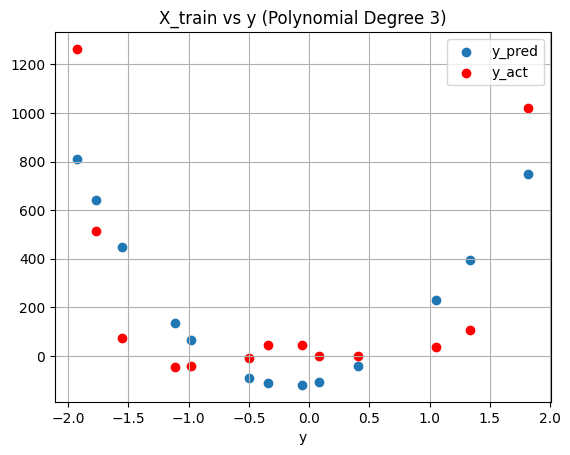

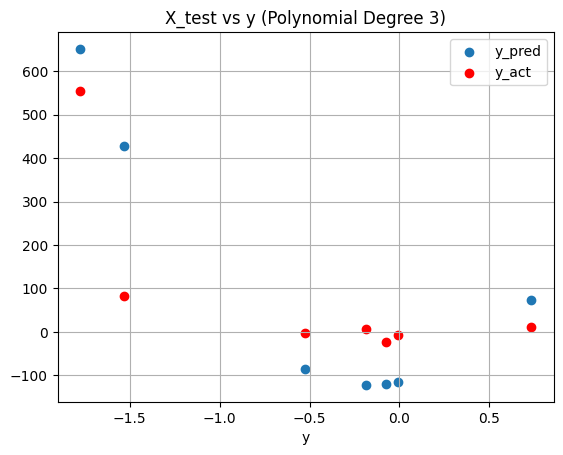

RMSE (train)(degree4) 93.85516158649563
RMSE (test)(degree4) 80.1945886876249


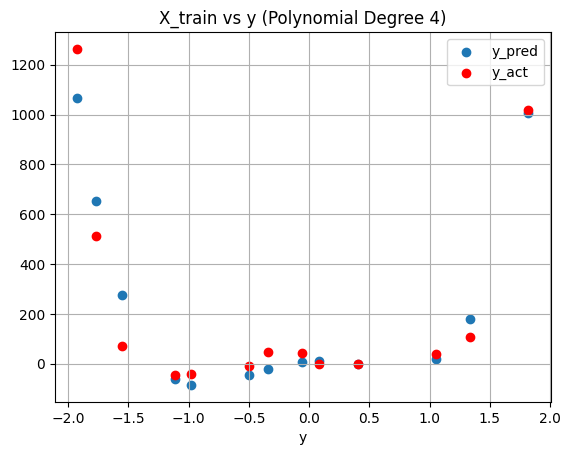

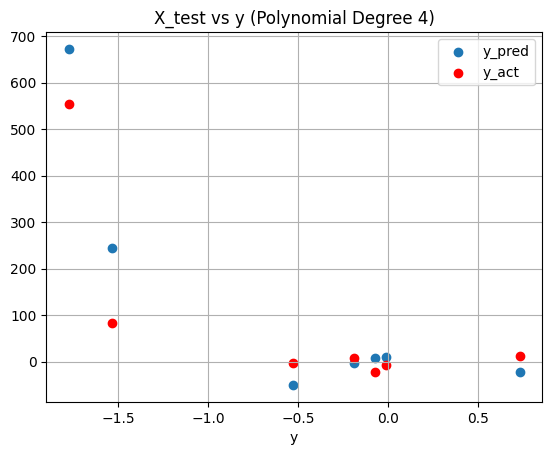

RMSE (train)(degree5) 81.50674196330844
RMSE (test)(degree5) 62.186764192921444


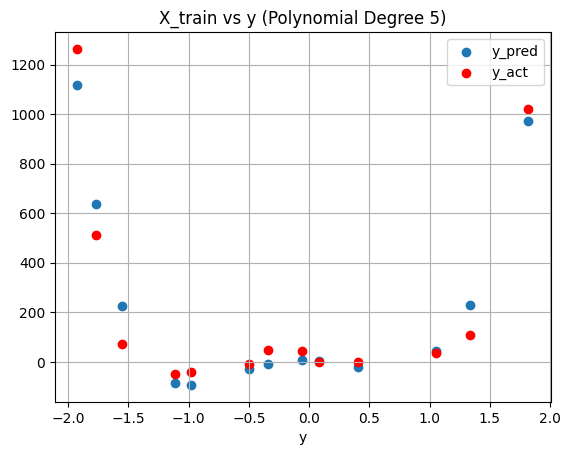

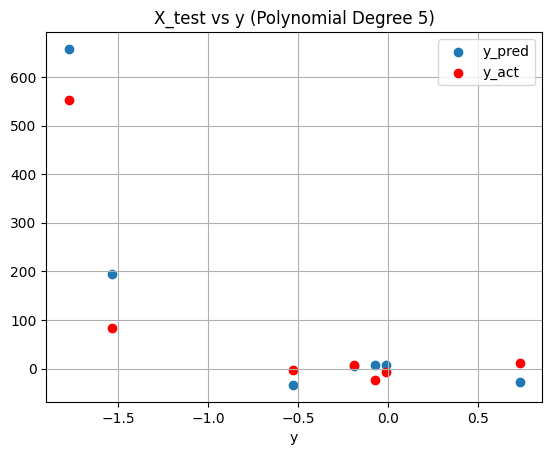

RMSE (train)(degree6) 27.320771904855754
RMSE (test)(degree6) 26.818245695052116


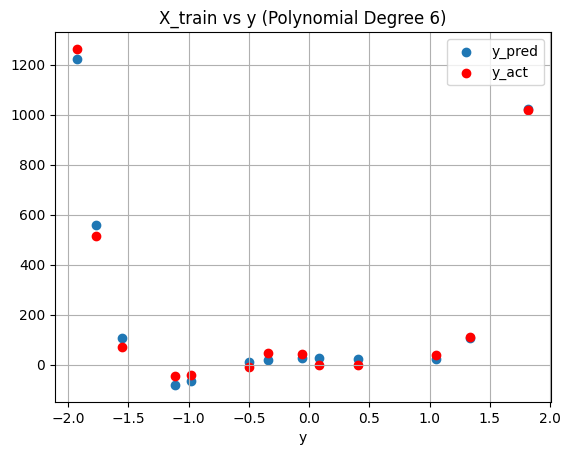

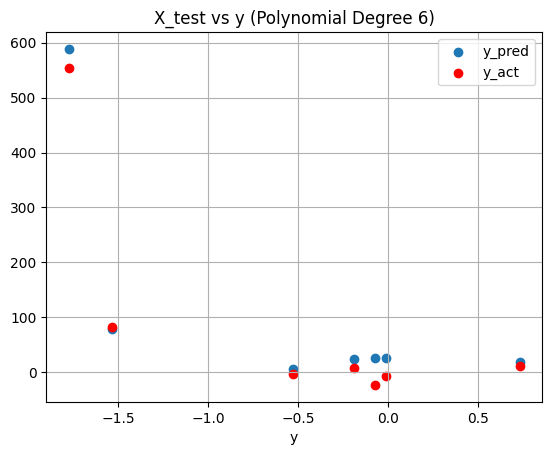

RMSE (train)(degree7) 19.65681751601114
RMSE (test)(degree7) 23.504224584346517


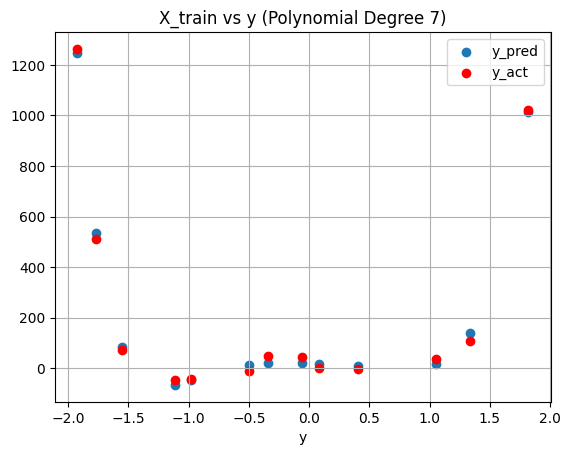

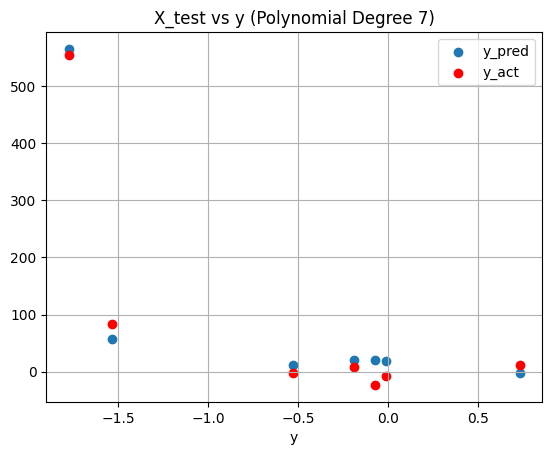

RMSE (train)(degree8) 15.410962810448519
RMSE (test)(degree8) 21.92713077546733


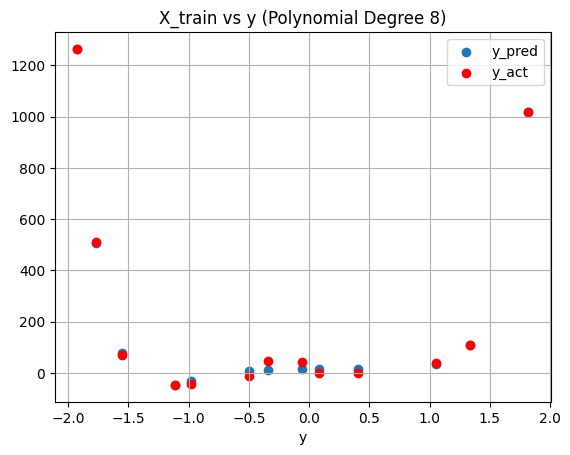

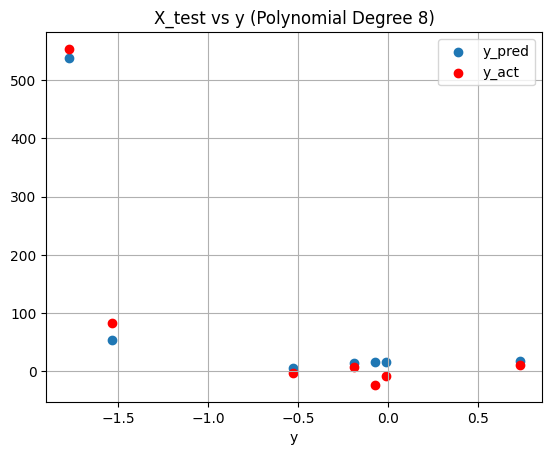

RMSE (train)(degree9) 15.529402526515746
RMSE (test)(degree9) 21.875805745224618


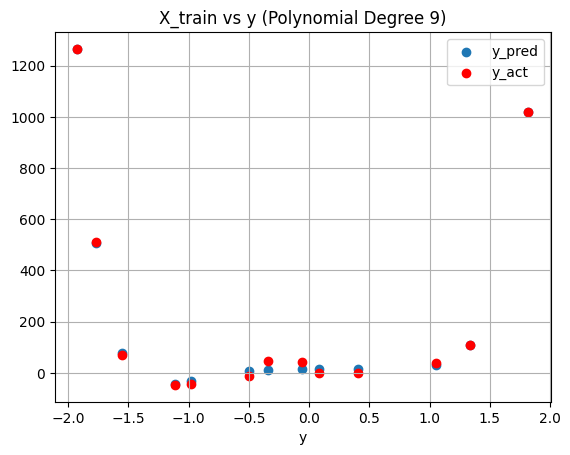

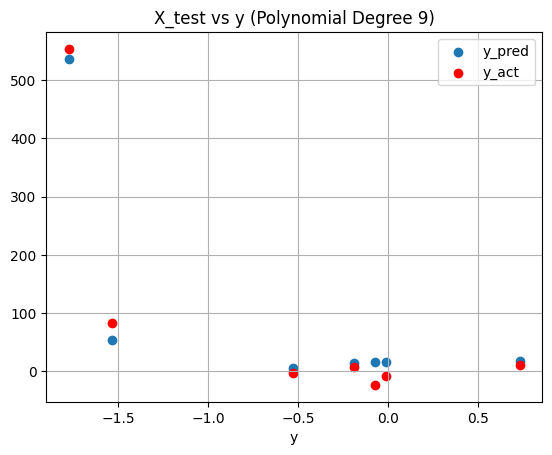

RMSE (train)(degree10) 15.491155613295419
RMSE (test)(degree10) 21.963064808117377


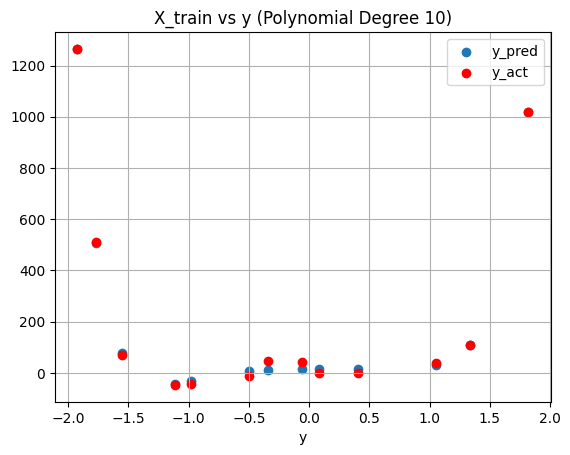

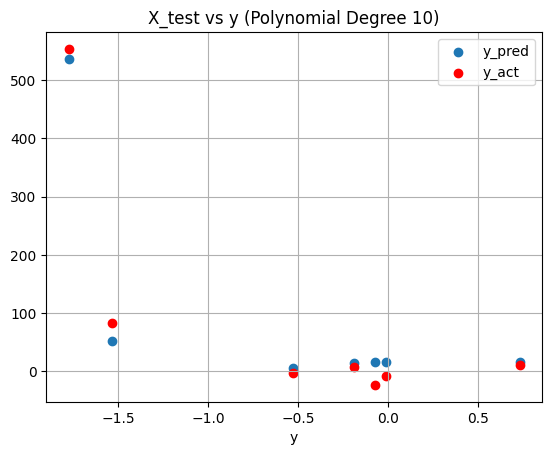

RMSE (train)(degree11) 15.33765851903457
RMSE (test)(degree11) 22.442850122500552


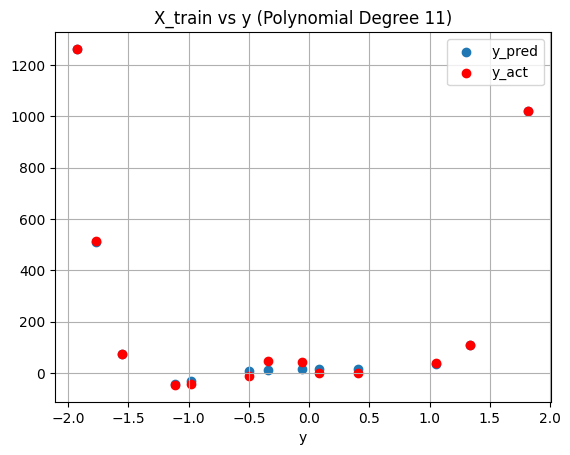

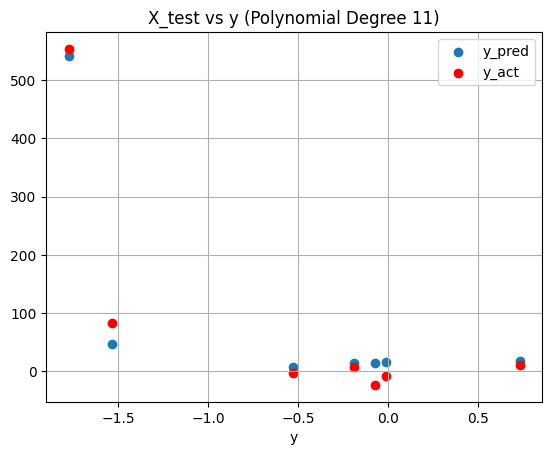

RMSE (train)(degree12) 15.533598904016054
RMSE (test)(degree12) 22.918866235804707


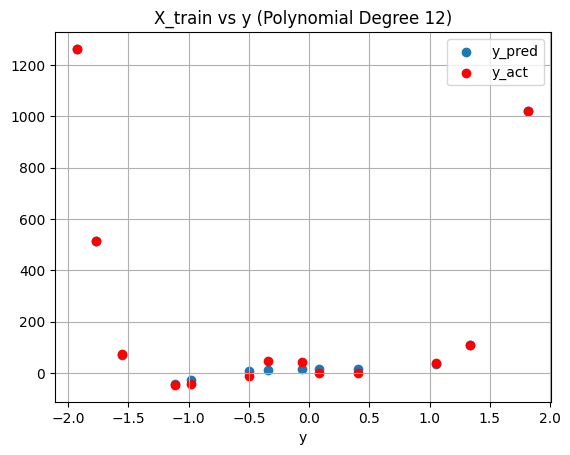

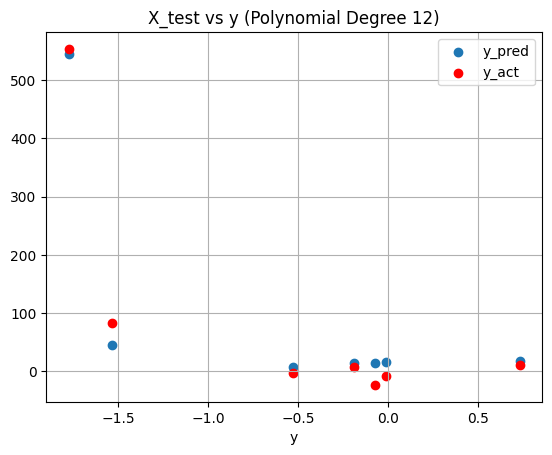

RMSE (train)(degree13) 15.541703590940502
RMSE (test)(degree13) 22.931807261644657


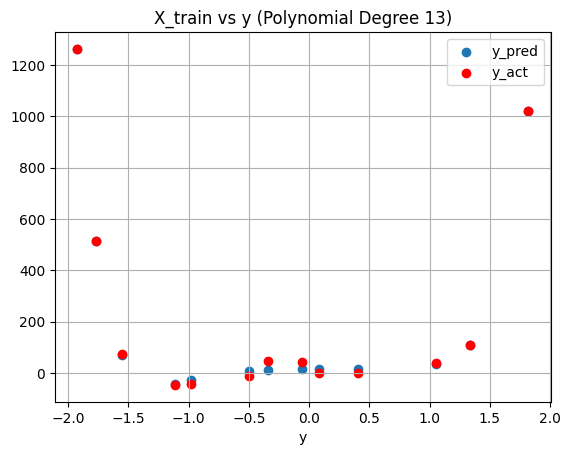

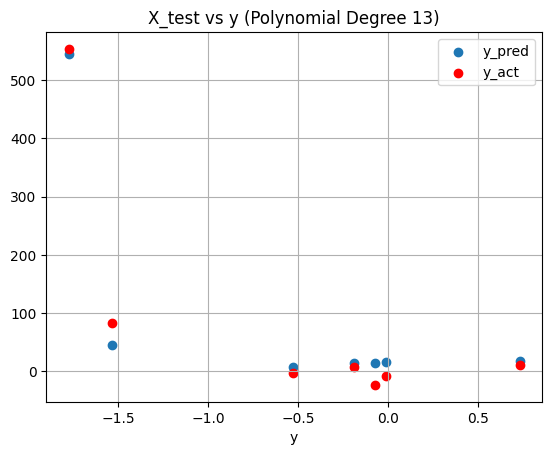

RMSE (train)(degree14) 15.408691753239113
RMSE (test)(degree14) 22.833145565391987


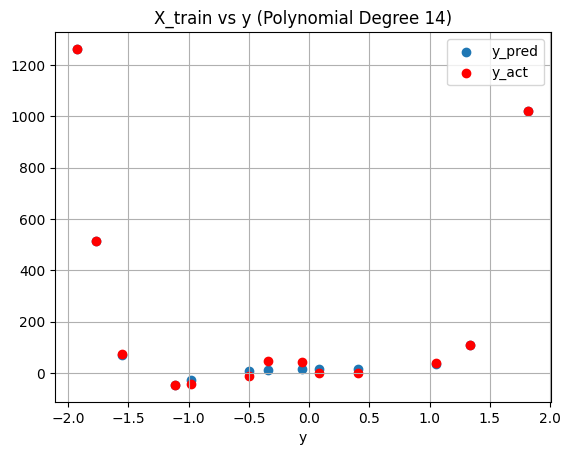

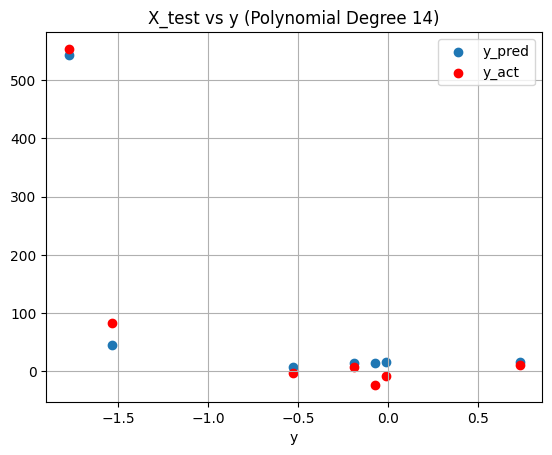

RMSE (train)(degree15) 15.424876302786295
RMSE (test)(degree15) 23.014196823772455


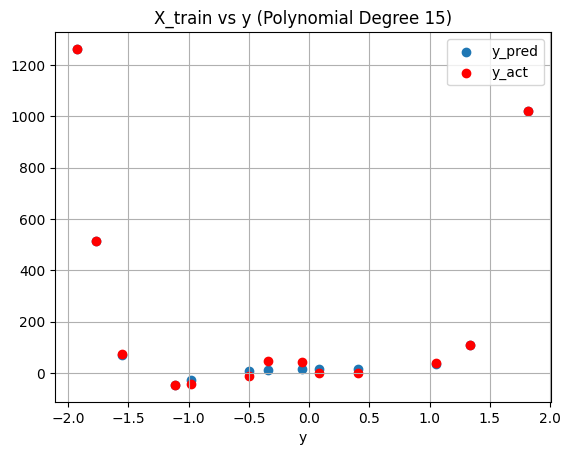

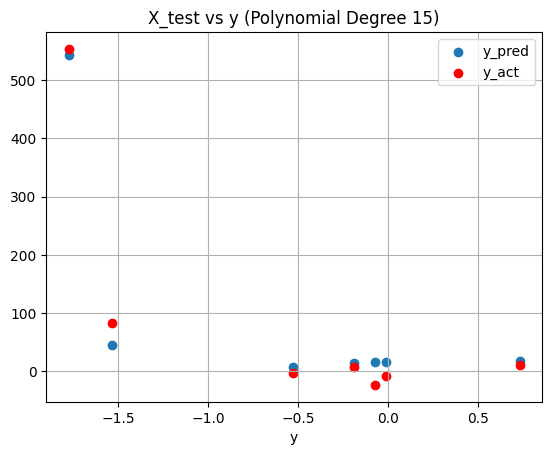

RMSE (train)(degree16) 15.352486131686254
RMSE (test)(degree16) 23.27836608847393


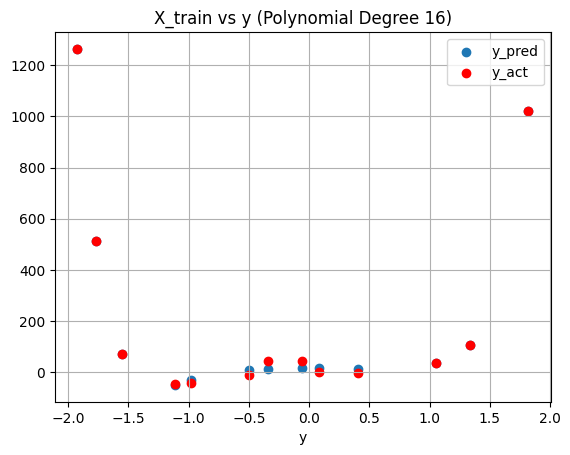

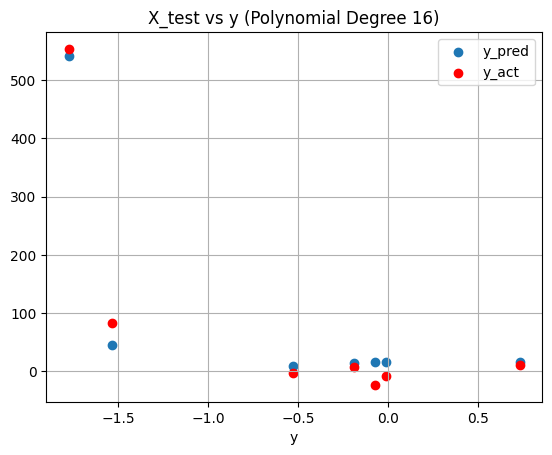

RMSE (train)(degree17) 15.418130397717253
RMSE (test)(degree17) 23.6438446763172


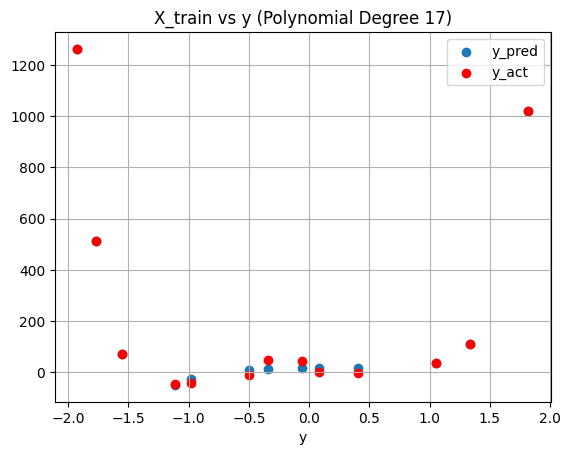

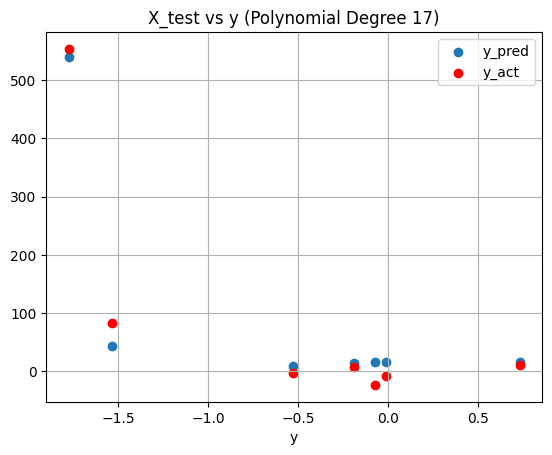

RMSE (train)(degree18) 15.455916556003217
RMSE (test)(degree18) 24.46393723306389


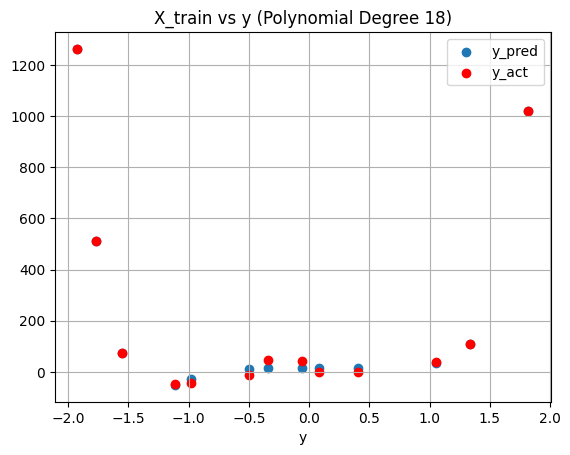

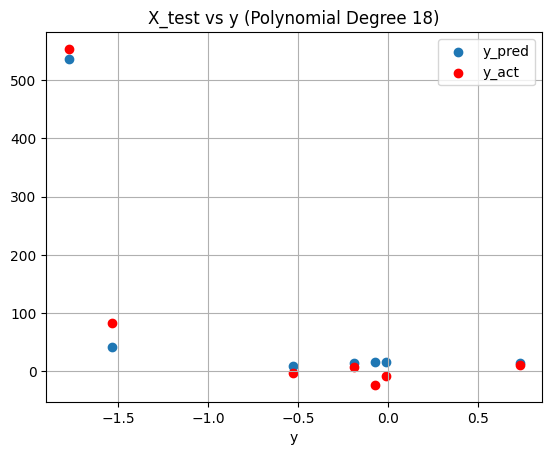

RMSE (train)(degree19) 15.471793941238225
RMSE (test)(degree19) 24.61450632369461


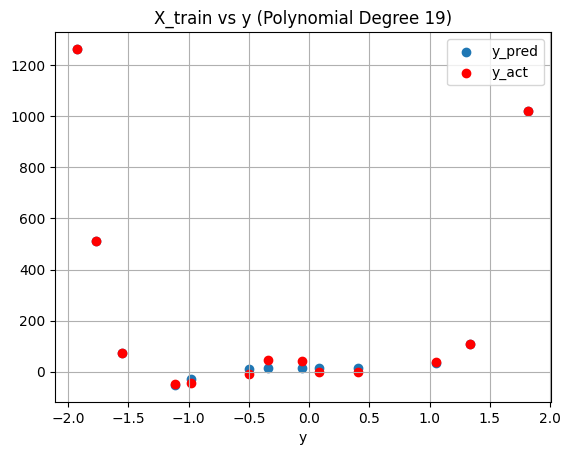

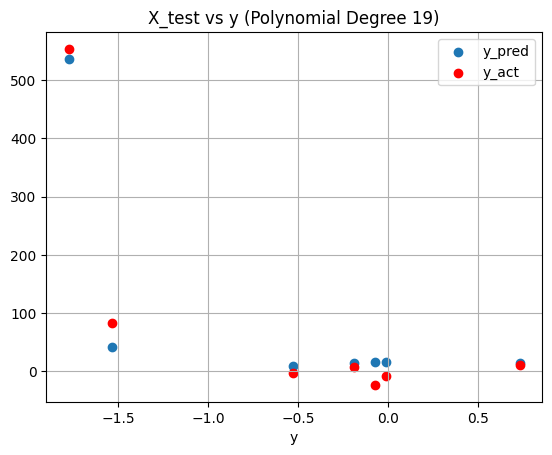

RMSE (train)(degree20) 15.521547037079122
RMSE (test)(degree20) 25.921217873561996


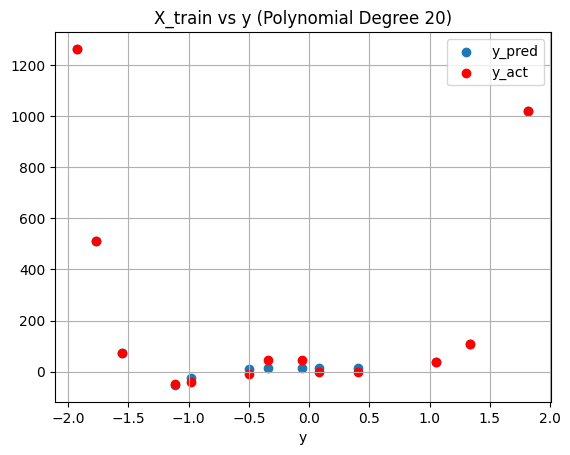

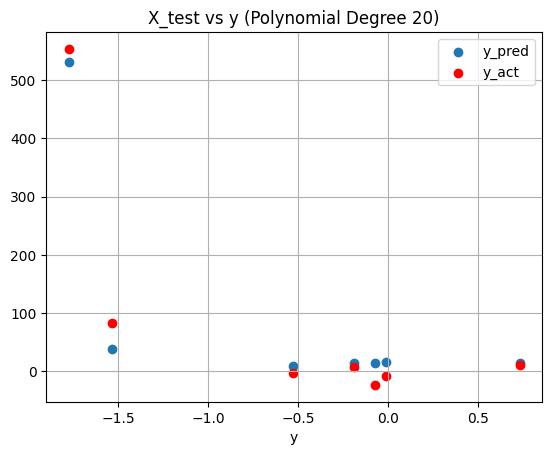

In [35]:
max_degree=21
rmse_train=[]
rmse_test=[]
for i in range(max_degree):
# print(i)    
    poly = PolynomialFeatures(degree = i)
    X_poly_train=poly.fit_transform(X_train)


    
# instantiating the Ridge regression model
    model = Ridge()
 
# training the model
    model.fit(X_poly_train, y_train)
 
# making predictions 
    y_pred = model.predict(X_poly_train)
    X_poly_test=poly.fit_transform(X_test)
    y_test_pred=model.predict(X_poly_test)
    print(f'RMSE (train)(degree{i})',np.sqrt(mse(y_pred,y_train)))

    print(f'RMSE (test)(degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')

    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.xlabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.xlabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

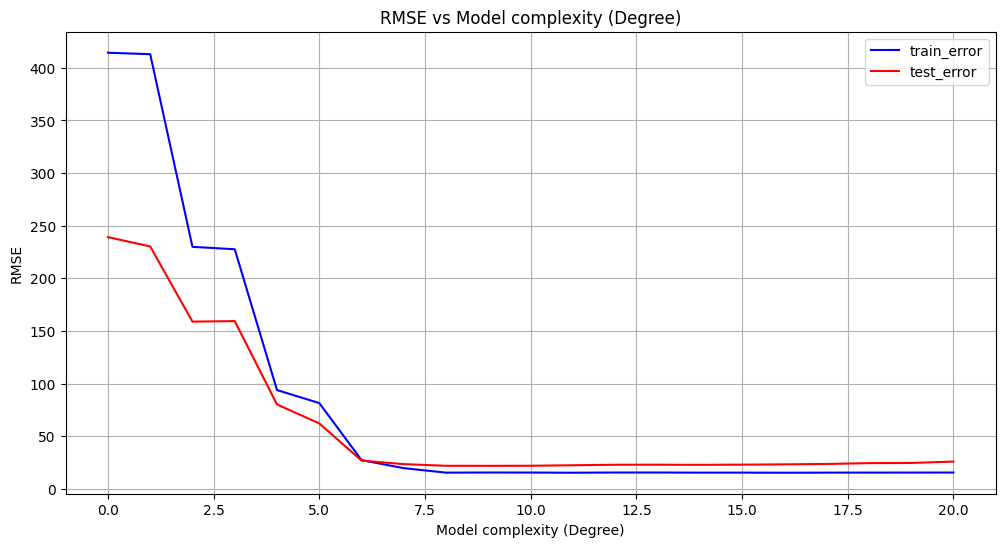

In [36]:

plt.figure(figsize=(12,6))
plt.plot(range(max_degree),rmse_train,c='b',label='train_error')
plt.plot(range(max_degree),rmse_test,c='r',label='test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

rmse for test: 18.702858164754737
mean: -1.2671345454388454e-14 , standard deviation: 18.702858164754737 variance: 349.7969035309329


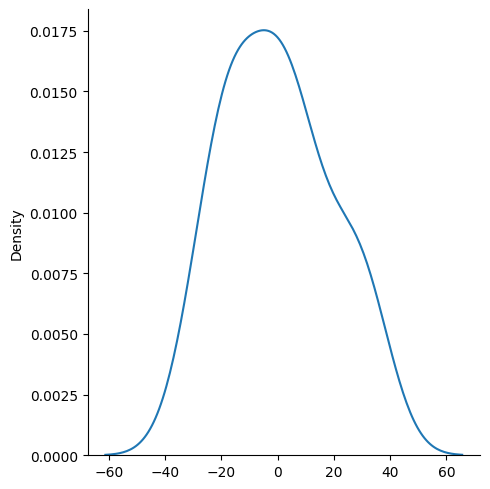

In [37]:
df_test = pd.read_csv('test.csv',header=None)
X_t=np.array(df_test[0]).reshape(-1,1)
y_t=np.array(df_test[1])
poly = PolynomialFeatures(degree = 11)
x_poly=poly.fit_transform(X_t)
model = Ridge(alpha=1)
model.fit(x_poly, y_t)
y_pred=model.predict(x_poly)
test_noise=(y_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test:', np.sqrt(mse(y_pred,y_t)))
print('mean:', np.mean(test_noise), ', standard deviation:', np.std(test_noise), 'variance:', np.std(test_noise)**2)

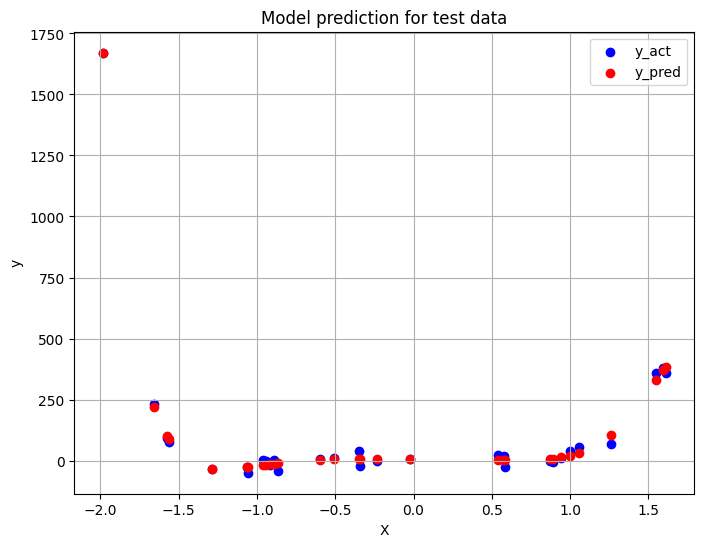

optimised weights: [  0.          -2.70275598  -8.29761444   3.90777359 -11.83177512
  10.54610585  -3.81285116  12.4865846   20.2104671   -2.05767486
  -4.17730114  -1.1038137 ]


In [38]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label='y_act')
plt.scatter(X_t,y_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('optimised weights:', model.coef_)

In [39]:
data = pd.read_csv('train.csv',header=None)
print(data.shape)

(70, 2)


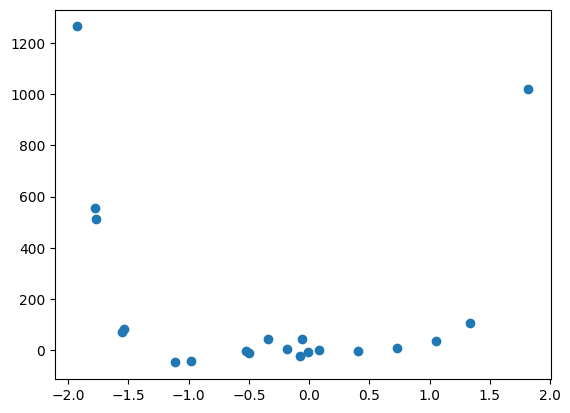

In [40]:
plt.scatter(X,y)
plt.show()

In [41]:
x_=data[0]
y_=data[1]

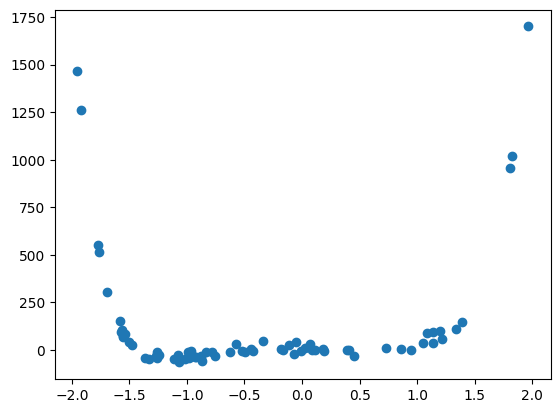

In [42]:
plt.scatter(x_,y_)
plt.show()

In [43]:
poly = PolynomialFeatures(degree=6, include_bias=False)

In [44]:
x = np.array(X)

In [45]:
poly

PolynomialFeatures(degree=6, include_bias=False)

In [46]:
poly_features = poly.fit_transform(X.reshape(-1, 1))

In [56]:
poly_reg_model = LR()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)

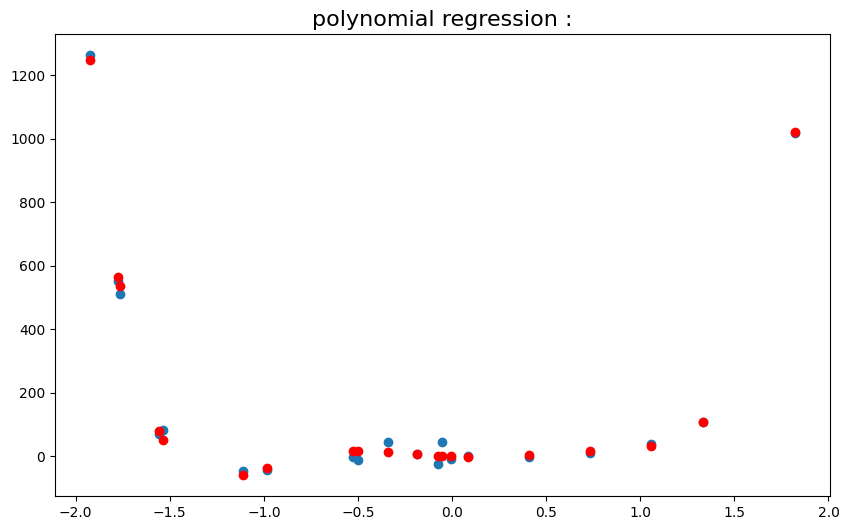

In [48]:
plt.figure(figsize=(10, 6))
plt.title("polynomial regression :", size=16)
plt.scatter(x, y)
plt.scatter(x, y_predicted, c="red")
plt.show()

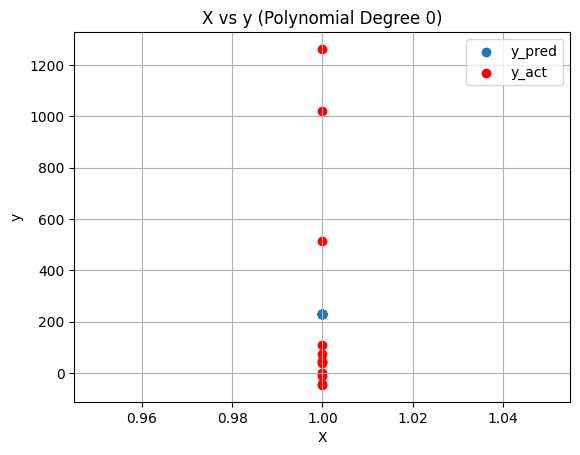

RMSE (train)(degree2) 412.97588794182343
RMSE (test)(degree2) 229.87178915801076


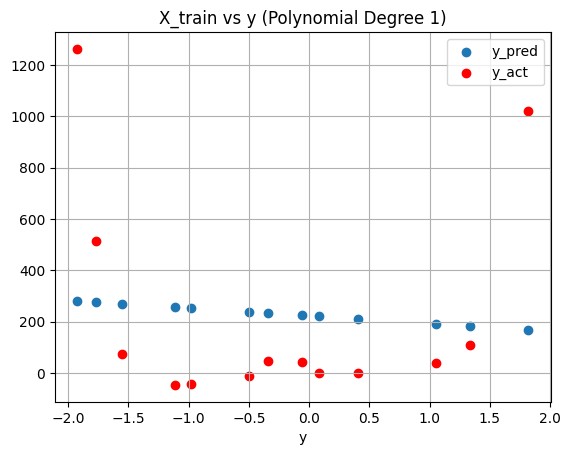

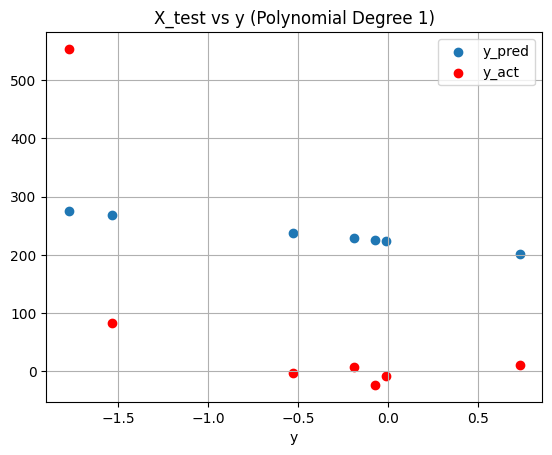

RMSE (train)(degree3) 229.34609139825355
RMSE (test)(degree3) 168.21708389571015


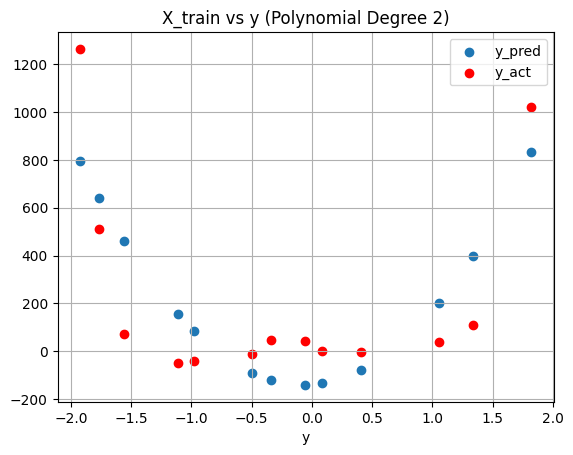

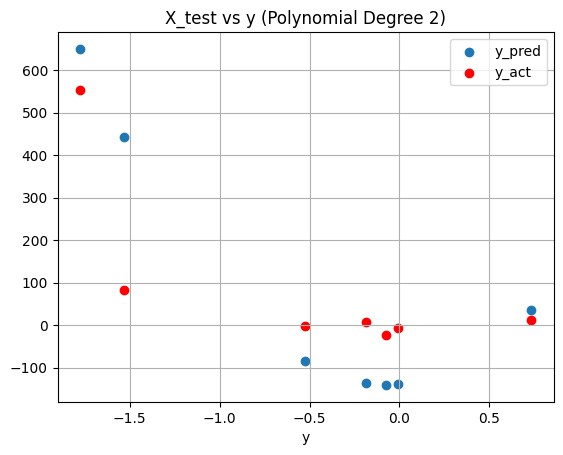

RMSE (train)(degree4) 226.73356241278324
RMSE (test)(degree4) 167.87968842409862


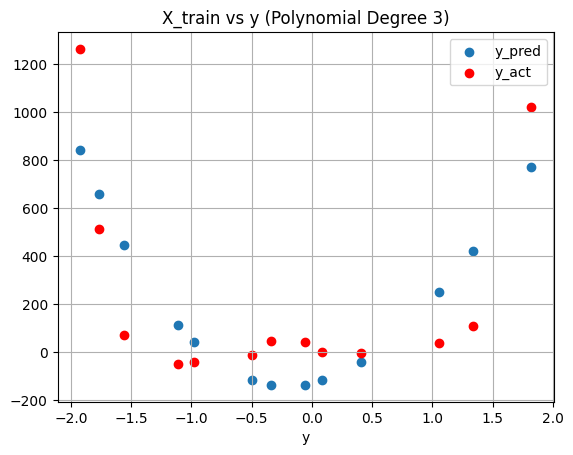

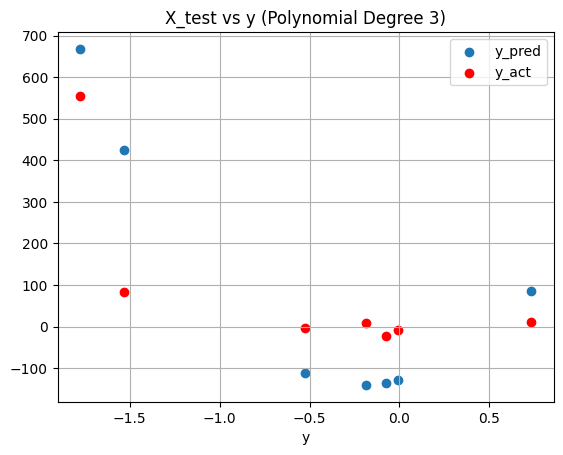

RMSE (train)(degree5) 78.96362534016596
RMSE (test)(degree5) 73.96964918369999


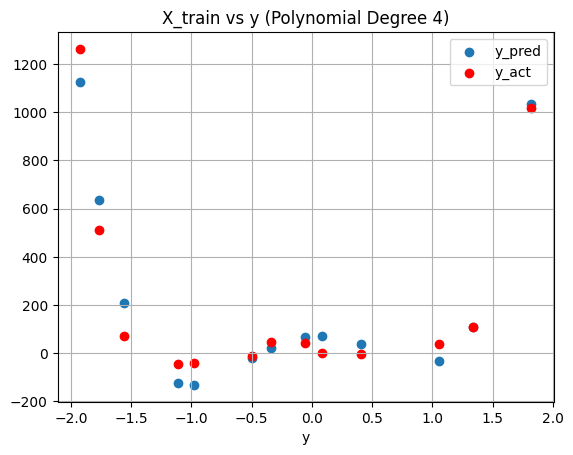

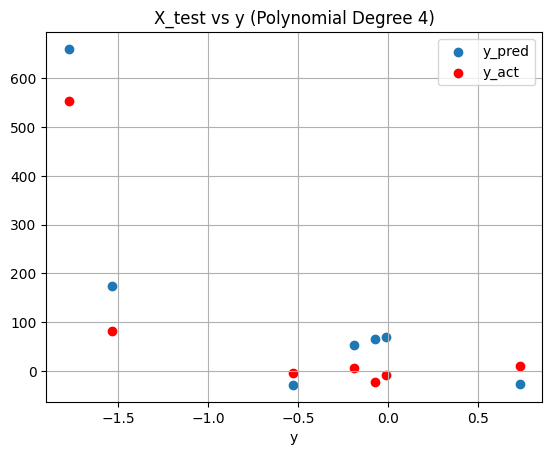

RMSE (train)(degree6) 56.00540214974233
RMSE (test)(degree6) 69.16758556570205


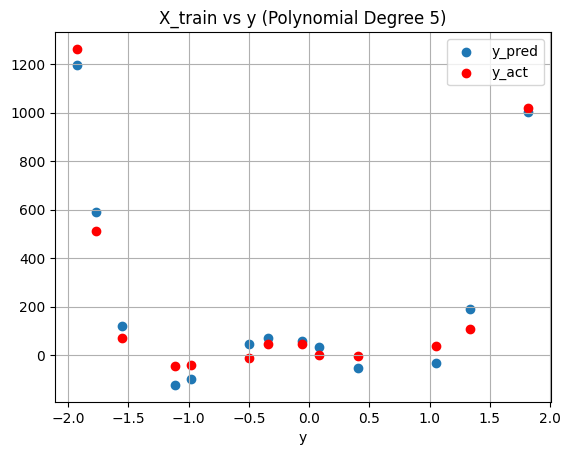

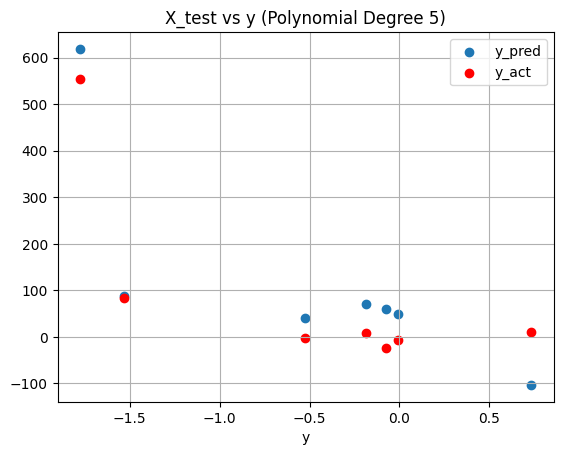

RMSE (train)(degree7) 17.044462744503583
RMSE (test)(degree7) 26.62891442771496


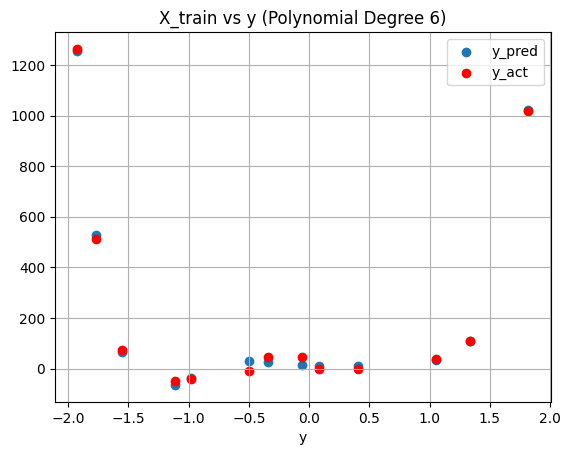

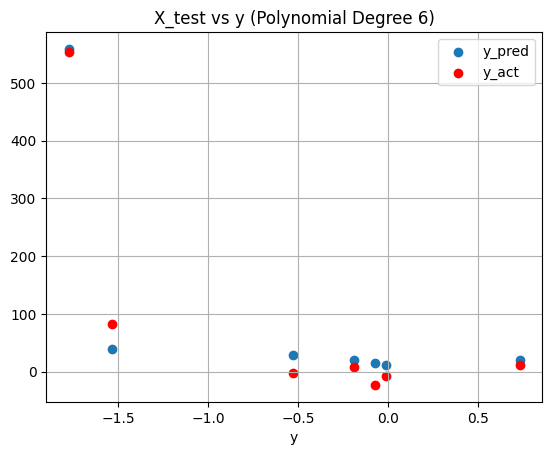

RMSE (train)(degree8) 16.312985829787806
RMSE (test)(degree8) 25.664236635930692


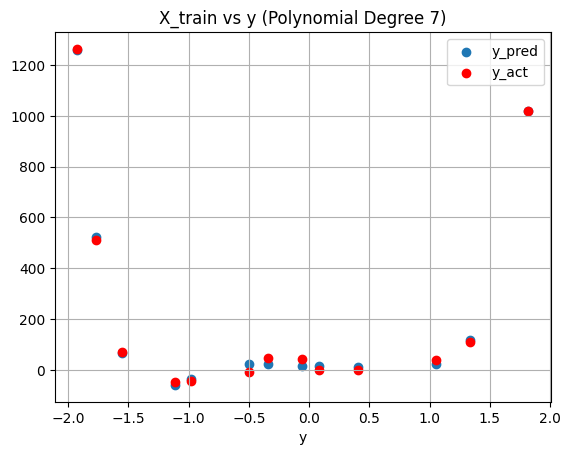

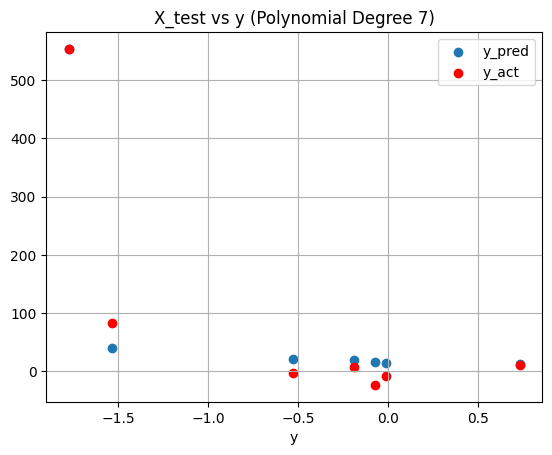

RMSE (train)(degree9) 12.183463837340915
RMSE (test)(degree9) 28.391796191063044


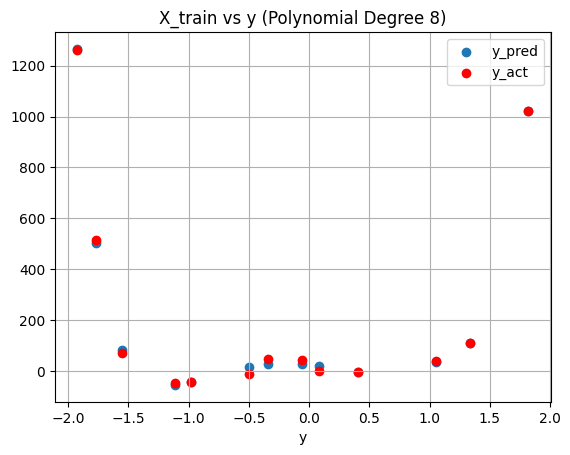

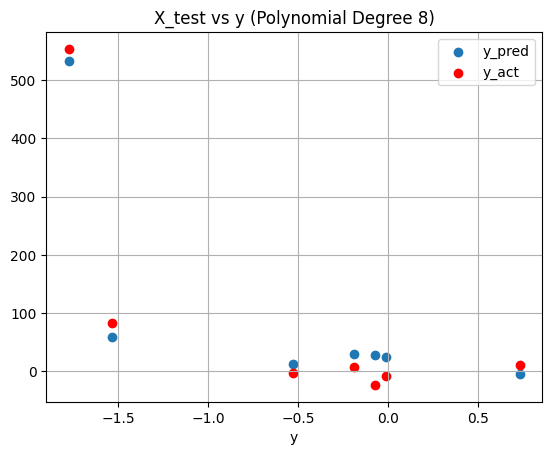

RMSE (train)(degree10) 11.708216062092792
RMSE (test)(degree10) 31.30622858883516


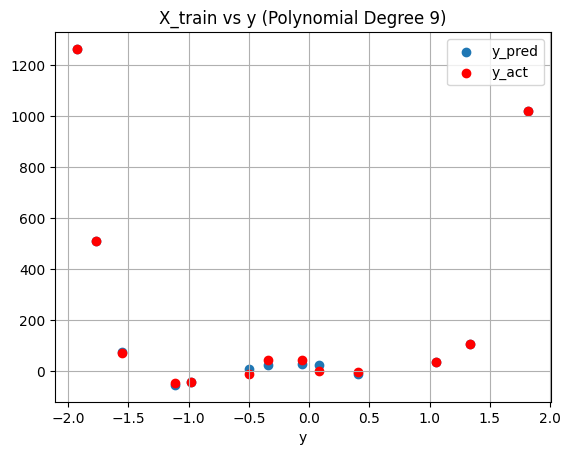

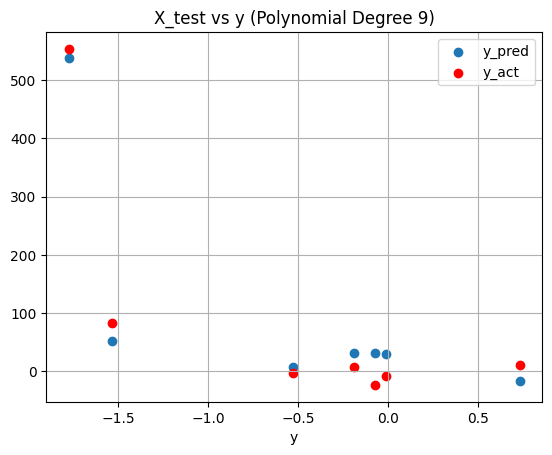

RMSE (train)(degree11) 6.863787433897976
RMSE (test)(degree11) 46.52086929725306


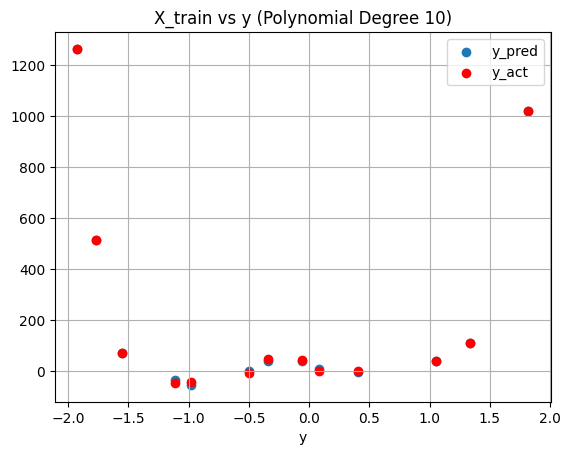

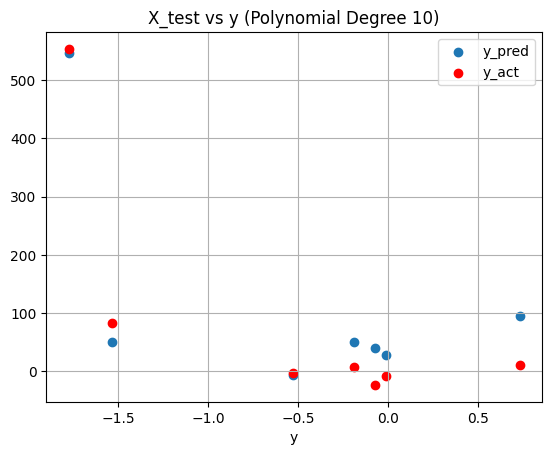

RMSE (train)(degree12) 1.8158955336043812
RMSE (test)(degree12) 123.99280464222406


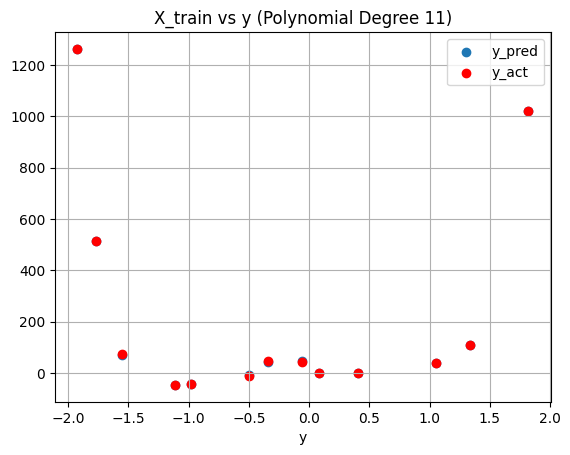

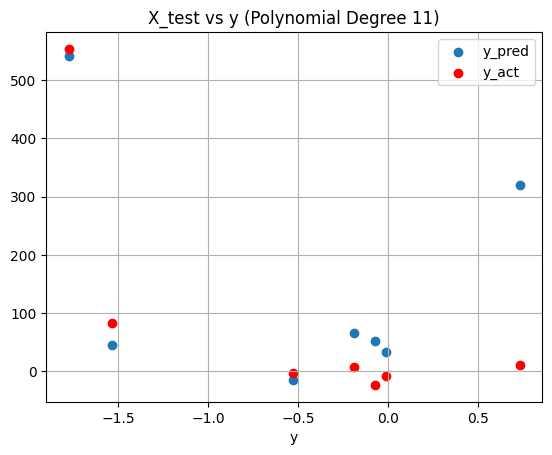

RMSE (train)(degree13) 0.0016551382121148994
RMSE (test)(degree13) 46.57090001827691


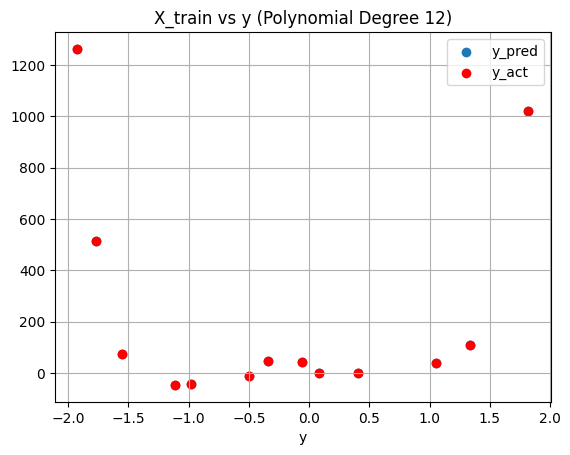

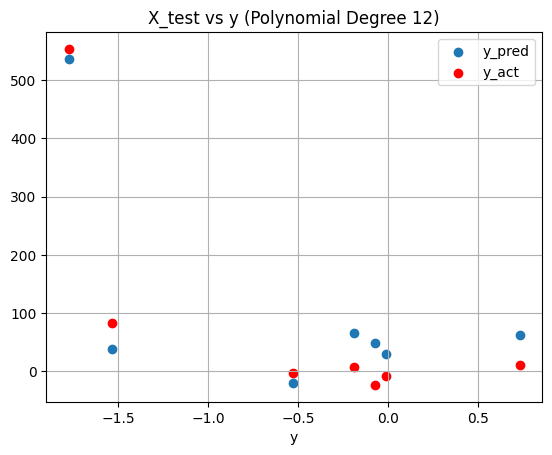

RMSE (train)(degree14) 4479.921548507083
RMSE (test)(degree14) 5246.759928314587


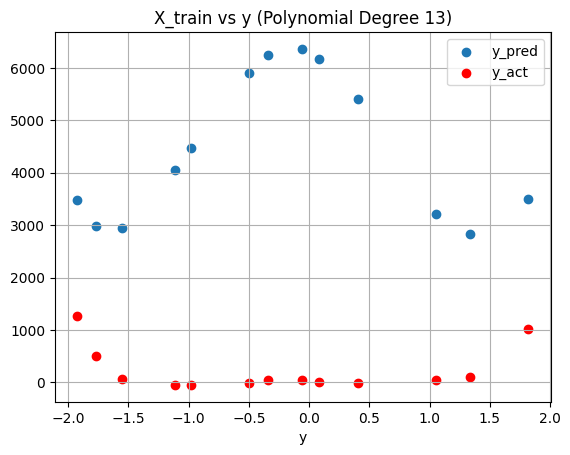

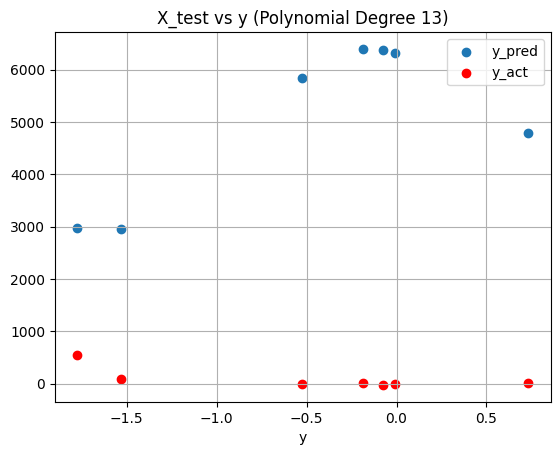

RMSE (train)(degree15) 478.10644611070603
RMSE (test)(degree15) 518.7579823135034


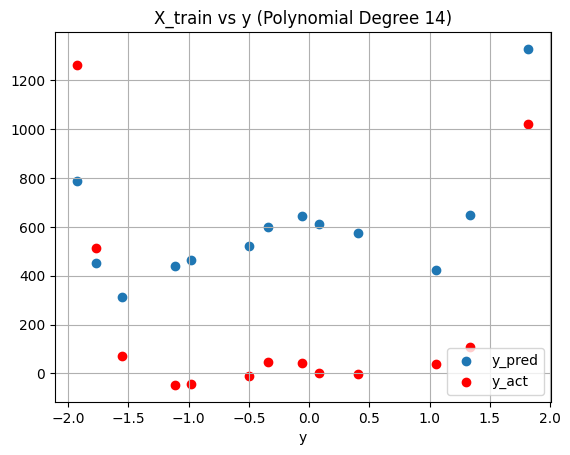

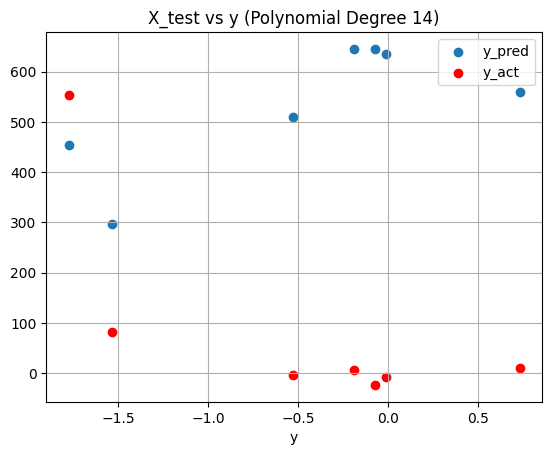

RMSE (train)(degree16) 915.4732799397776
RMSE (test)(degree16) 1033.9716434629079


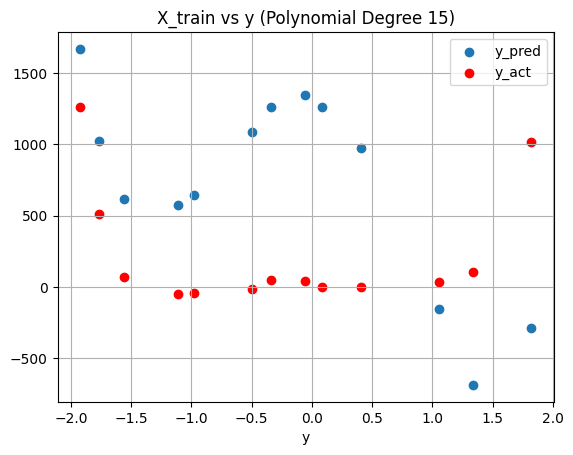

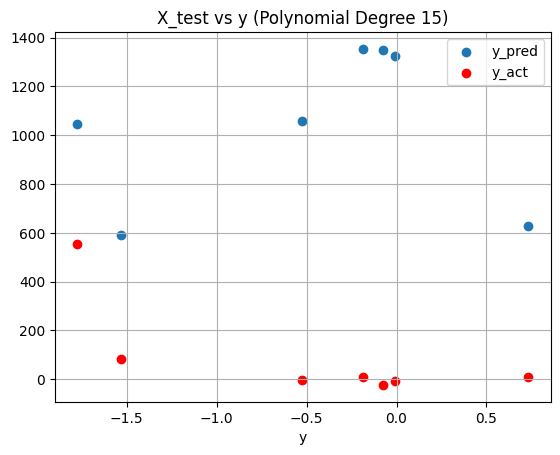

RMSE (train)(degree17) 1308.4304564779052
RMSE (test)(degree17) 1485.7375240705114


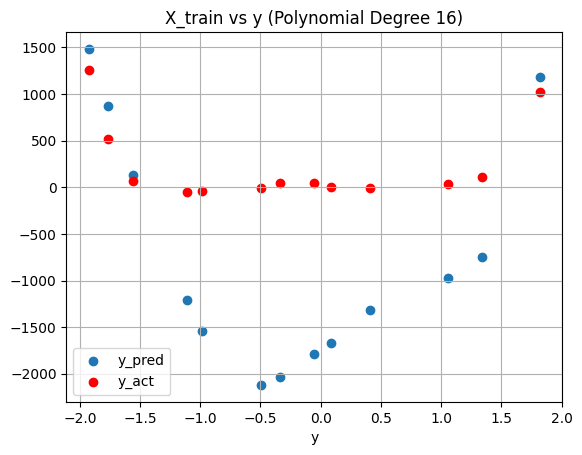

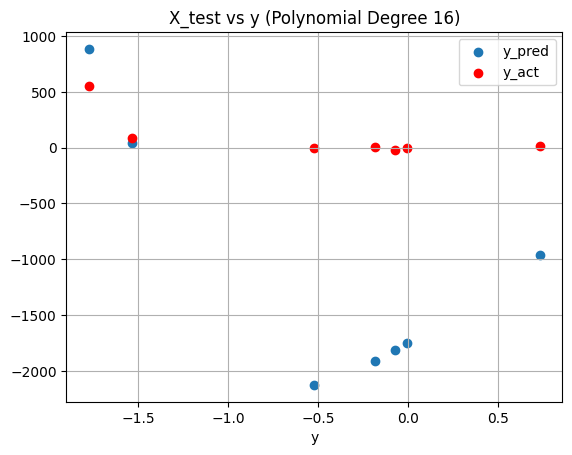

RMSE (train)(degree18) 6734.813470747743
RMSE (test)(degree18) 8071.282802510298


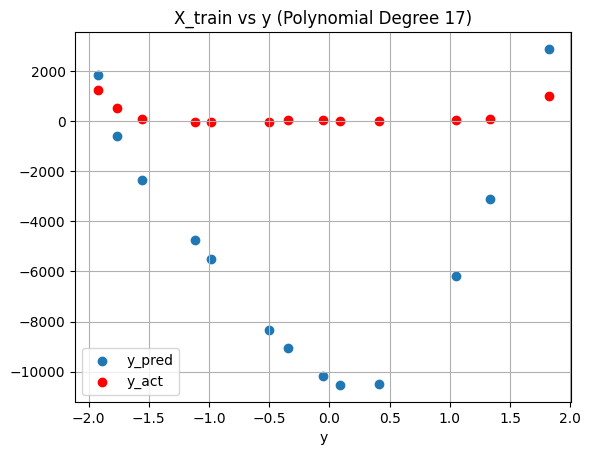

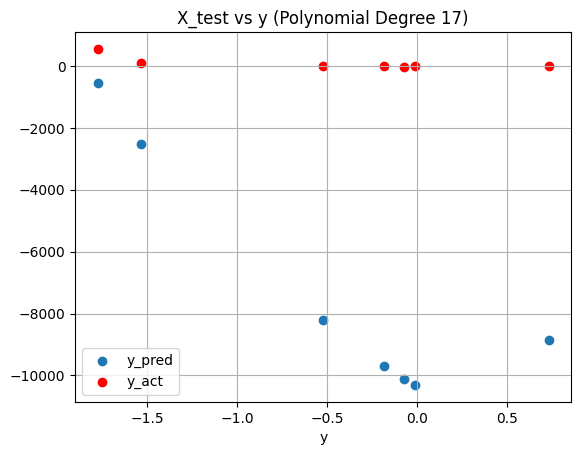

RMSE (train)(degree19) 6806.1610917784665
RMSE (test)(degree19) 7910.497584863614


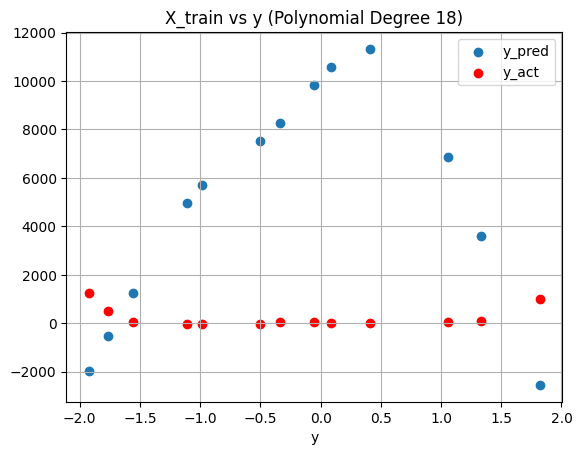

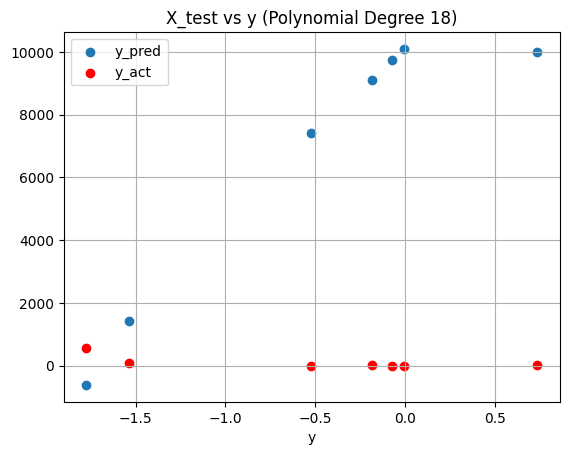

RMSE (train)(degree20) 16740.403033335428
RMSE (test)(degree20) 14689.177773539135


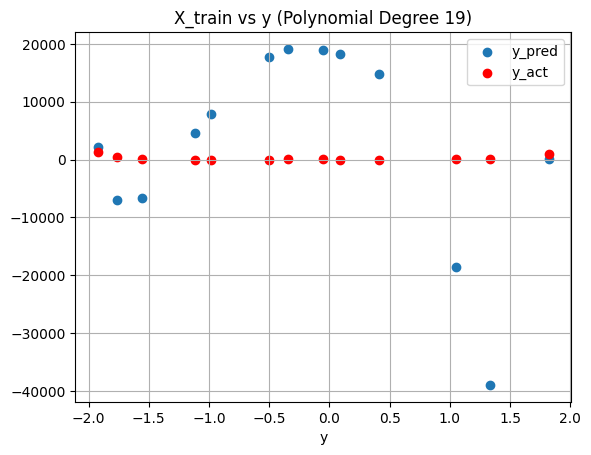

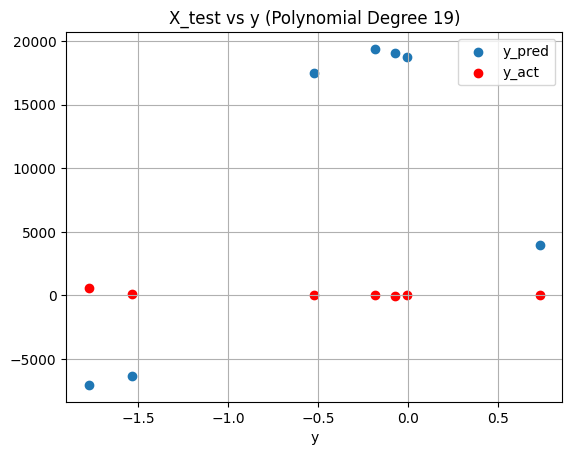

In [49]:
# FULL dataset analysis 
data = pd.read_csv('train.csv',header=None)
X_=data[0]
y_=data[1]
X_=np.array(df[0]).reshape(-1,1)
y_=np.array(df[1])
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)
# analytic
n=len(y_train)
m=len(y_test)
X_list_train=[np.ones((n,1))]
X_list_test=[np.ones((m,1))]
w_ml_list=[]
X_l_train=np.ones((n,1))
X_l_test=np.ones((m,1))
w_ml=np.dot((la.inv(X_l_train.T @ X_l_train) @  X_l_train.T),y_train)
w_ml_list.append(w_ml)
y_pred=np.dot(X_l_train,w_ml.reshape(-1,1))
plt.scatter(X_l_train,y_pred,label='y_pred')
plt.scatter(X_l_train,y_train,label="y_act",c='r')
plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y (Polynomial Degree 0)")
plt.legend()
plt.grid(visible=True)
plt.show()

max_degree=21
rmse_train=[]
rmse_test=[]
for i in range(2,max_degree):
    X_l_train=np.ones((n,1))
    X_l_test=np.ones((m,1))
    for j in range(1,i):
        X_l_train=np.append(X_l_train,np.vstack(X_train**j),axis=1)
        X_l_test=np.append(X_l_test,np.vstack(X_test**j),axis=1)
    X_list_train.append(X_l_train)
    X_list_test.append(X_l_test)
    w_ml=np.dot((la.inv(X_l_train.T @ X_l_train) @  X_l_train.T),y_train)
    w_ml_list.append(w_ml)
    y_pred=np.dot(X_l_train,w_ml.reshape(-1,1))
    y_test_pred=np.dot(X_l_test,w_ml.reshape(-1,1))
    print(f'RMSE (train)(degree{i})',np.sqrt(mse(y_pred,y_train)))
    print(f'RMSE (test)(degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')

    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.xlabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i-1})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.xlabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i-1})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

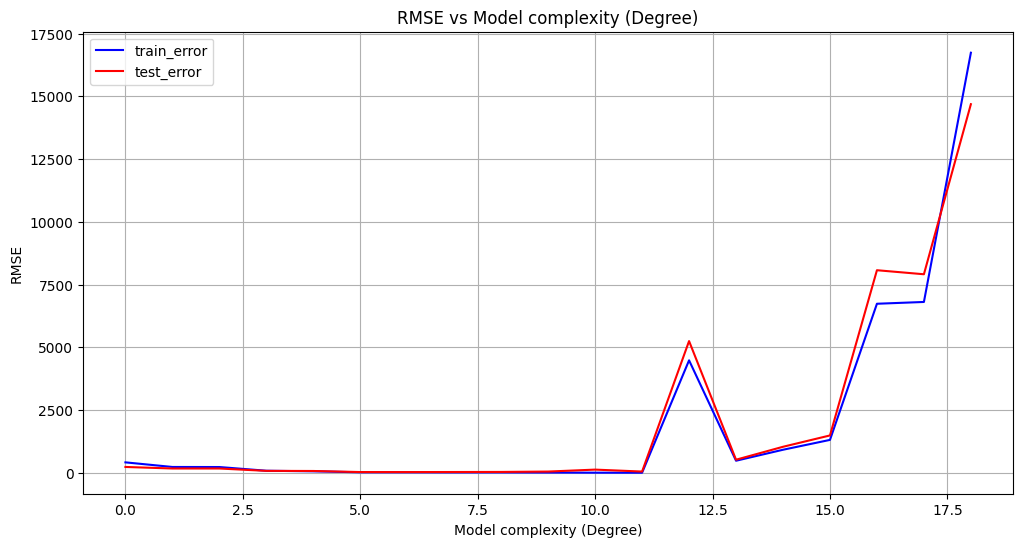

In [50]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree-2),rmse_train,c='b',label='train_error')
plt.plot(range(max_degree-2),rmse_test,c='r',label='test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

mean: 1.6373746798756463e-06 , standard deviation: 6.863787433897781 variance: 47.11157793773309


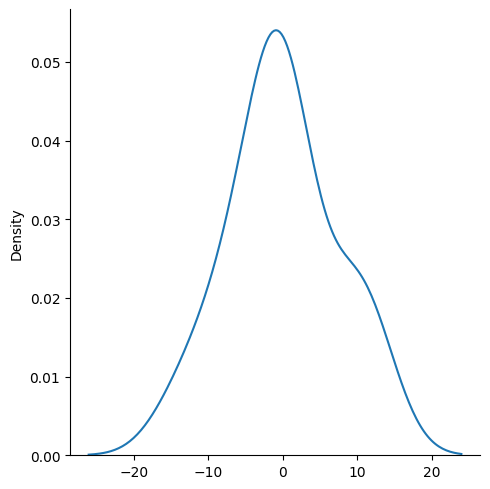

In [51]:
n=len(y_train)
m=len(y_test)
X_l_train=np.ones((n,1))
X_l_test=np.ones((m,1))
Degree=11
for j in range(1,Degree):
    X_l_train=np.append(X_l_train,np.vstack(X_train**j),axis=1)
    X_l_test=np.append(X_l_test,np.vstack(X_test**j),axis=1)
X_list_train.append(X_l_train)
X_list_test.append(X_l_test)
w_ml=np.dot((la.inv(X_l_train.T @ X_l_train) @  X_l_train.T),y_train)
y_pred=np.dot(X_l_train,w_ml.reshape(-1,1))
y_test_pred=np.dot(X_l_test,w_ml.reshape(-1,1))
train_noise=(y_pred.reshape(-1)-y_train)
sns.displot(train_noise,kind='kde')

print('mean:', np.mean(train_noise), ', standard deviation:', np.std(train_noise), 'variance:', np.std(train_noise)**2)

((array([-1.62649229, -1.1460438 , -0.83908498, -0.59616318, -0.38436112,
         -0.18866497,  0.        ,  0.18866497,  0.38436112,  0.59616318,
          0.83908498,  1.1460438 ,  1.62649229]),
  array([-1.32879221e+01, -7.29785740e+00, -7.19527596e+00, -2.30495619e+00,
         -1.81025995e+00, -2.90350877e-01, -7.33306581e-02,  3.39003401e-03,
          2.13809585e-01,  1.26097844e+00,  8.49182496e+00,  1.11057431e+01,
          1.11842283e+01])),
 (7.403083841305979, 1.6373746800326803e-06, 0.9648607367556714))

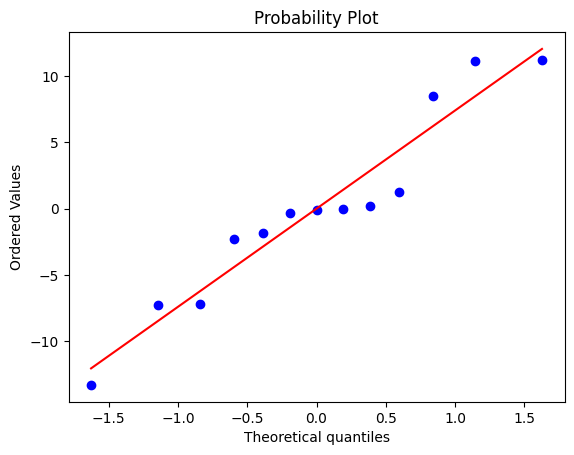

In [52]:
from scipy import stats

stats.probplot(train_noise,dist='norm',plot=plt)

((array([-1.31487275, -0.74397649, -0.3471943 ,  0.        ,  0.3471943 ,
          0.74397649,  1.31487275]),
  array([-32.25142194,  -7.43315133,  -3.81203249,  35.3091906 ,
          43.3574065 ,  62.83063845,  83.45722644])),
 (45.94250232480865, 25.92255089085302, 0.9854538758437557))

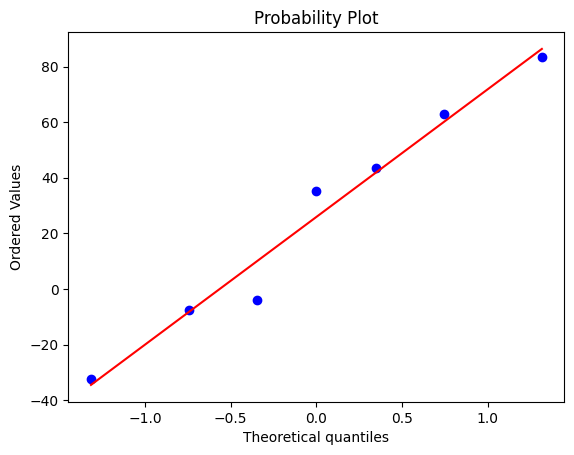

In [53]:
test_noise=y_test_pred.reshape(-1)-y_test
stats.probplot(test_noise,plot=plt)

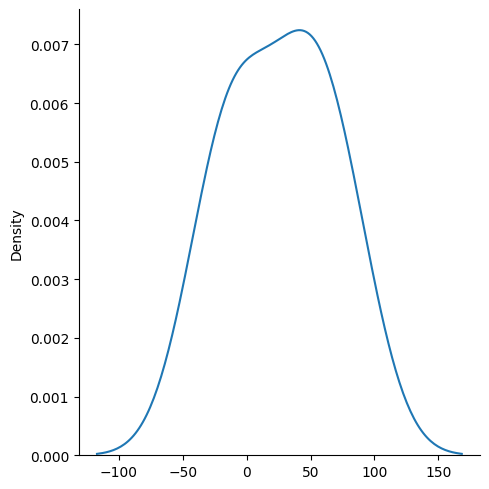

In [54]:
sns.displot(test_noise,kind='kde')

In [55]:
print('mean:', np.mean(test_noise), ', standard deviation:', np.std(test_noise), 'variance:', np.std(test_noise)**2)

mean: 25.922550890853024 , standard deviation: 38.62916819559072 variance: 1492.2126354832378
